# Hyperparameter Optimization with Reinforcement Learning 

## Check out: Optuna, TD3

In [5]:
%%time
import random
import matplotlib.pyplot as plt 


optimizers = [1,2]
neurons = [50,200]
layers = [1,3]
epochs = [20,100]
parameters = [optimizers,neurons,layers,epochs]
state = [None] * 4


episodes = 50
epsilon = 0.99
decay = 0.95
step = 5
MAX = [0.3]*4

reward_log_total = [[0]*(step) for _ in range(episodes+1)]
Q = [[0] * 8 for _ in range(step)]
for j in range(step):
    for i in range(8):
        Q[j][i] = np.random.uniform(0.4, 0.41)
#original = initial_state(state,optimizers,neurons,layers,epochs)
#a,b,c,d = original[0],original[1],original[2],original[3]
# Update q values
act = np.random.randint(7)
print('action',act)

#values 
for j in range(episodes):
    clear_session()
    print('episode:',j)
    state = initial_state(state,optimizers,neurons,layers,epochs)
    print('begin_epsiode_state:',state)
    if np.random.random() > epsilon:
        # GET THE ACTION
        act = np.argmax(Q[0])
    else:
        act = np.random.randint(0, 8) 
    reward_log = [0]
    epsilon = epsilon*decay
    for i in range(step-1):
        states = i
        lr = 0.01 # Learning rate (Alpha)
        print('action:',act)
        state = action(state,act)
        print('max:',MAX[i])
        reward =   Reward(state,x_train,x_test,Y_train,Y_test)
        reward_func = reward - MAX[i] 
        reward_log.append(reward)
        gamma  = 0.95 #Discount rate 
        print('Old_Q:',Q[states][act])
        Q[states][act] = Q[states][act] + lr * (reward_func + gamma * np.max(Q[states+1][:]) - Q[states][act])
        print('New_Q:',Q[states][act])
        if np.random.random() > epsilon:
            # GET THE ACTION
            act = np.argmax(Q[states+1])
        else:
            act = np.random.randint(0, 8) #This action is not used for the last Q-table row  
        print('step_state:',state)
        print(np.array(Q))
        if reward >= MAX[i]:
            MAX[i] = reward
    reward_log_total[j+1] = reward_log
for i in range(len(reward_log_total)):
    plt.scatter(i,np.mean(reward_log_total[i]))
plt.show()

action 4
episode: 0
begin_epsiode_state: [2, 200, 1, 20]
action: 6
max: 0.3
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Accuracy 0.3705882340669632
Old_Q: 0.4096773629976014
New_Q: 0.41016666420441367
step_state: [2, 200, 1, 20]
[[0.40093296 0.40260472 0.40718669 0.4065224  0.4091661  0.40111321
  0.41016666 0.40987086]
 [0.40144446 0.40834513 0.40844132 0.40620916 0.40652186 0.40708519
  0.4025902  0.40168446]
 [0.40007808 0.40509026 0.40632001 0.40761327 0.4006577  0.40978253
  0.40915268 0.40931507]
 [0.4039596  0.40003462 0.40379381 0.40854884 0.40775091 0.40453984
  0.40955069 0.40798345]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 1
max: 0.3
Accuracy 0.3964244484901428
Old_Q: 0.40834513078350804
New_Q: 0.4091188580033731
step_state: [2

Accuracy 0.48316031992435454
Old_Q: 0.41195970049036196
New_Q: 0.40946661476489915
step_state: [1, 50, 1, 20]
[[0.40093296 0.40260472 0.40718669 0.4065224  0.4091661  0.40236988
  0.40946661 0.40987086]
 [0.40144446 0.40911886 0.40929828 0.40620916 0.40652186 0.40708519
  0.4025902  0.40364959]
 [0.40007808 0.40509026 0.40632001 0.40761327 0.40146458 0.40978253
  0.40915268 0.41203941]
 [0.4039596  0.40003462 0.4052718  0.40933278 0.40775091 0.40453984
  0.40955069 0.40798345]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 2
max: 0.7085351765155792
Accuracy 0.4895040333271027
Old_Q: 0.40929827917008016
New_Q: 0.4069293593182323
step_state: [1, 50, 1, 20]
[[0.40093296 0.40260472 0.40718669 0.4065224  0.4091661  0.40236988
  0.40946661 0.40987086]
 [0.40144446 0.40911886 0.40692936 0.40620916 0.40652186 0.40708519
  0.4025902  0.40364959]
 [0.40007808 0.40509026 0.40632001 0.40761327 0.40146458 0.40978253
  0.40915268 0.41203941]
 [0

Accuracy 0.520761251449585
Old_Q: 0.4111479287905222
New_Q: 0.4090589057122973
step_state: [2, 200, 1, 100]
[[0.39951297 0.40260472 0.4059879  0.4065224  0.4091661  0.40236988
  0.40423205 0.40987086]
 [0.40144446 0.4009001  0.4061666  0.40620916 0.40652186 0.40708519
  0.4025902  0.40364959]
 [0.39793804 0.40044013 0.40632001 0.40761327 0.40146458 0.40978253
  0.40915268 0.40905891]
 [0.4039596  0.40003462 0.4052718  0.40933278 0.40775091 0.40453984
  0.40614757 0.40548123]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 1
max: 0.638177615404129
Accuracy 0.5242214560508728
Old_Q: 0.40003462164639003
New_Q: 0.39877451586994833
step_state: [2, 200, 1, 100]
[[0.39951297 0.40260472 0.4059879  0.4065224  0.4091661  0.40236988
  0.40423205 0.40987086]
 [0.40144446 0.4009001  0.4061666  0.40620916 0.40652186 0.40708519
  0.4025902  0.40364959]
 [0.39793804 0.40044013 0.40632001 0.40761327 0.40146458 0.40978253
  0.40915268 0.40905891]
 [0

Accuracy 0.5196078479290008
Old_Q: 0.40652240413189505
New_Q: 0.4044217906629956
step_state: [2, 200, 1, 100]
[[0.39749357 0.40260472 0.40124327 0.40442179 0.4091661  0.40096131
  0.40423205 0.40987086]
 [0.40144446 0.4009001  0.4061666  0.40245638 0.40652186 0.40419678
  0.40138577 0.40364959]
 [0.39793804 0.40044013 0.40632001 0.40761327 0.40146458 0.40571754
  0.40665916 0.40883388]
 [0.4039596  0.39877452 0.4052718  0.40611002 0.40804571 0.40258647
  0.40614757 0.40548123]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 4
max: 0.7085351765155792
Accuracy 0.5520184576511383
Old_Q: 0.4065218594787352
New_Q: 0.40477539552348624
step_state: [2, 200, 1, 100]
[[0.39749357 0.40260472 0.40124327 0.40442179 0.4091661  0.40096131
  0.40423205 0.40987086]
 [0.40144446 0.4009001  0.4061666  0.40245638 0.4047754  0.40419678
  0.40138577 0.40364959]
 [0.39793804 0.40044013 0.40632001 0.40761327 0.40146458 0.40571754
  0.40665916 0.40883388]
 

Accuracy 0.5483275651931763
Old_Q: 0.4004401283621325
New_Q: 0.3986972567353202
step_state: [2, 200, 1, 100]
[[0.39749357 0.40260472 0.39654732 0.40442179 0.40708243 0.40096131
  0.40423205 0.40803043]
 [0.40144446 0.39896428 0.40075696 0.40070454 0.4047754  0.40419678
  0.40138577 0.40364959]
 [0.39793804 0.39869726 0.40632001 0.40408485 0.40146458 0.40571754
  0.40665916 0.40483004]
 [0.4039596  0.39877452 0.4052718  0.40447544 0.40455901 0.40258647
  0.40309969 0.40548123]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 7
max: 0.6874279141426086
Accuracy 0.5275663137435913
Old_Q: 0.40548122897079775
New_Q: 0.40370760271065437
step_state: [2, 200, 1, 100]
[[0.39749357 0.40260472 0.39654732 0.40442179 0.40708243 0.40096131
  0.40423205 0.40803043]
 [0.40144446 0.39896428 0.40075696 0.40070454 0.4047754  0.40419678
  0.40138577 0.40364959]
 [0.39793804 0.39869726 0.40632001 0.40408485 0.40146458 0.40571754
  0.40665916 0.40483004]
 

Accuracy 0.5500576734542847
Old_Q: 0.4070824340993431
New_Q: 0.40525343206165776
step_state: [2, 200, 1, 100]
[[0.39687957 0.40260472 0.39654732 0.40442179 0.40525343 0.40096131
  0.40423205 0.40661763]
 [0.40144446 0.39896428 0.40075696 0.40070454 0.40332288 0.40338601
  0.40138577 0.40364959]
 [0.39793804 0.39869726 0.40632001 0.40387794 0.40050778 0.40571754
  0.40498359 0.40483004]
 [0.4039596  0.39877452 0.40296971 0.40454693 0.40360776 0.40258647
  0.40309969 0.4037076 ]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 2
max: 0.7085351765155792
Accuracy 0.49573240578174593
Old_Q: 0.4007569572318237
New_Q: 0.39848140007505634
step_state: [2, 50, 1, 100]
[[0.39687957 0.40260472 0.39654732 0.40442179 0.40525343 0.40096131
  0.40423205 0.40661763]
 [0.40144446 0.39896428 0.3984814  0.40070454 0.40332288 0.40338601
  0.40138577 0.40364959]
 [0.39793804 0.39869726 0.40632001 0.40387794 0.40050778 0.40571754
  0.40498359 0.40483004]
 

Accuracy 0.605767011642456
Old_Q: 0.40483003684836927
New_Q: 0.4035998626068139
step_state: [1, 50, 3, 100]
[[0.39422852 0.40260472 0.39654732 0.40442179 0.40275625 0.40096131
  0.40423205 0.40434461]
 [0.40144446 0.39896428 0.3984814  0.40070454 0.4010205  0.40086931
  0.40138577 0.40133362]
 [0.39793804 0.39869726 0.40413115 0.40387794 0.40050778 0.40286688
  0.40294084 0.40359986]
 [0.40310661 0.39877452 0.40296971 0.40267769 0.40360776 0.40258647
  0.40309969 0.40286521]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 4
max: 0.7110726594924927
Accuracy 0.6283737063407898
Old_Q: 0.40360775587885217
New_Q: 0.4026244908221014
step_state: [1, 50, 1, 100]
[[0.39422852 0.40260472 0.39654732 0.40442179 0.40275625 0.40096131
  0.40423205 0.40434461]
 [0.40144446 0.39896428 0.3984814  0.40070454 0.4010205  0.40086931
  0.40138577 0.40133362]
 [0.39793804 0.39869726 0.40413115 0.40387794 0.40050778 0.40286688
  0.40294084 0.40359986]
 [0.

Accuracy 0.3799307942390442
Old_Q: 0.40423204954393316
New_Q: 0.4007087762495131
step_state: [2, 200, 1, 20]
[[0.39339754 0.40260472 0.39654732 0.40407942 0.40275625 0.40096131
  0.40070878 0.40306011]
 [0.400486   0.39896428 0.39747342 0.40059672 0.4010205  0.40086931
  0.40138577 0.40133362]
 [0.39793804 0.39869726 0.40312581 0.40354191 0.40050778 0.40286688
  0.40294084 0.40359986]
 [0.40216411 0.39877452 0.40199282 0.40267769 0.40262449 0.40258647
  0.40185161 0.40286521]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 5
max: 0.7145328760147095
Accuracy 0.35594002306461336
Old_Q: 0.40086931158446165
New_Q: 0.39710888863388083
step_state: [2, 200, 3, 20]
[[0.39339754 0.40260472 0.39654732 0.40407942 0.40275625 0.40096131
  0.40070878 0.40306011]
 [0.400486   0.39896428 0.39747342 0.40059672 0.4010205  0.39710889
  0.40138577 0.40133362]
 [0.39793804 0.39869726 0.40312581 0.40354191 0.40050778 0.40286688
  0.40294084 0.40359986]
 

Accuracy 0.521107268333435
Old_Q: 0.40331433095081554
New_Q: 0.4011614836611844
step_state: [2, 200, 1, 100]
[[0.39339754 0.40260472 0.39654732 0.39981002 0.40059672 0.40096131
  0.40070878 0.40306011]
 [0.400486   0.39896428 0.39747342 0.40059672 0.39772067 0.39710889
  0.40002387 0.40031541]
 [0.39793804 0.39869726 0.40312581 0.40306434 0.40050778 0.40286688
  0.3991977  0.40116148]
 [0.40216411 0.39691801 0.40199282 0.40222968 0.40262449 0.40258647
  0.40185161 0.40063447]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 4
max: 0.7110726594924927
Accuracy 0.5325259506702423
Old_Q: 0.4026244908221014
New_Q: 0.4006925808592126
step_state: [2, 200, 1, 100]
[[0.39339754 0.40260472 0.39654732 0.39981002 0.40059672 0.40096131
  0.40070878 0.40306011]
 [0.400486   0.39896428 0.39747342 0.40059672 0.39772067 0.39710889
  0.40002387 0.40031541]
 [0.39793804 0.39869726 0.40312581 0.40306434 0.40050778 0.40286688
  0.3991977  0.40116148]
 [0

Accuracy 0.6425605535507202
Old_Q: 0.4021615161992309
New_Q: 0.4012750773771162
step_state: [1, 50, 1, 100]
[[0.39339754 0.39791915 0.39654732 0.39981002 0.40059672 0.40096131
  0.40070878 0.40127508]
 [0.40006516 0.39896428 0.39747342 0.4001344  0.39772067 0.39262666
  0.40002387 0.40031541]
 [0.39793804 0.39869726 0.40227253 0.39880297 0.40000316 0.40286688
  0.3991977  0.40116148]
 [0.40216411 0.39691801 0.40199282 0.40222968 0.40069258 0.39805908
  0.40185161 0.40063447]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 7
max: 0.7145328760147095
Accuracy 0.628258365392685
Old_Q: 0.4003154080304111
New_Q: 0.3992767442475129
step_state: [1, 50, 1, 100]
[[0.39339754 0.39791915 0.39654732 0.39981002 0.40059672 0.40096131
  0.40070878 0.40127508]
 [0.40006516 0.39896428 0.39747342 0.4001344  0.39772067 0.39262666
  0.40002387 0.39927674]
 [0.39793804 0.39869726 0.40227253 0.39880297 0.40000316 0.40286688
  0.3991977  0.40116148]
 [0.40

Accuracy 0.4600922703742981
Old_Q: 0.3979380393626351
New_Q: 0.3952228041510494
step_state: [1, 50, 3, 20]
[[0.39339754 0.39791915 0.39654732 0.39981002 0.40059672 0.39785804
  0.40070878 0.3987343 ]
 [0.39918009 0.39896428 0.39747342 0.39990493 0.39772067 0.39262666
  0.39486022 0.39927674]
 [0.3952228  0.39869726 0.40227253 0.39880297 0.40000316 0.4017921
  0.39778984 0.40031822]
 [0.4008631  0.39691801 0.40199282 0.40173885 0.40069258 0.39805908
  0.40185161 0.39944449]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 2
max: 0.7184544444084168
Accuracy 0.4981545627117157
Old_Q: 0.40199282153314425
New_Q: 0.3996496965344005
step_state: [1, 50, 3, 20]
[[0.39339754 0.39791915 0.39654732 0.39981002 0.40059672 0.39785804
  0.40070878 0.3987343 ]
 [0.39918009 0.39896428 0.39747342 0.39990493 0.39772067 0.39262666
  0.39486022 0.39927674]
 [0.3952228  0.39869726 0.40227253 0.39880297 0.40000316 0.4017921
  0.39778984 0.40031822]
 [0.4008

Accuracy 0.6802768230438232
Old_Q: 0.3993330826780775
New_Q: 0.3987908121285825
step_state: [1, 200, 1, 100]
[[0.39339754 0.39791915 0.39654732 0.39879081 0.39808976 0.39785804
  0.39666803 0.3987343 ]
 [0.39877002 0.39896428 0.39747342 0.39620382 0.39772067 0.39262666
  0.39486022 0.39830395]
 [0.3952228  0.39869726 0.40116206 0.39474557 0.40000316 0.40142435
  0.39778984 0.40031822]
 [0.4008631  0.39691801 0.3996497  0.4011804  0.40069258 0.39805908
  0.39788014 0.39944449]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 1
max: 0.7145328760147095
Accuracy 0.5470588326454162
Old_Q: 0.3989642777006449
New_Q: 0.39711342578167846
step_state: [2, 200, 1, 100]
[[0.39339754 0.39791915 0.39654732 0.39879081 0.39808976 0.39785804
  0.39666803 0.3987343 ]
 [0.39877002 0.39711343 0.39747342 0.39620382 0.39772067 0.39262666
  0.39486022 0.39830395]
 [0.3952228  0.39869726 0.40116206 0.39474557 0.40000316 0.40142435
  0.39778984 0.40031822]
 [

Accuracy 0.5286043882369995
Old_Q: 0.40031822497983777
New_Q: 0.3982449347553348
step_state: [2, 200, 3, 100]
[[0.39339754 0.39791915 0.39654732 0.39751279 0.39808976 0.39785804
  0.39666803 0.39580367]
 [0.39733039 0.39711343 0.39747342 0.39620382 0.39772067 0.39262666
  0.39090841 0.39795779]
 [0.3952228  0.39869726 0.40030697 0.39474557 0.40000316 0.39910713
  0.39637562 0.39824493]
 [0.39995342 0.39691801 0.3996497  0.39873928 0.39899106 0.39805908
  0.39788014 0.39944449]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 0
max: 0.7184544444084168
Accuracy 0.7106113016605378
Old_Q: 0.39995341780975463
New_Q: 0.39975525423773306
step_state: [1, 200, 3, 100]
[[0.39339754 0.39791915 0.39654732 0.39751279 0.39808976 0.39785804
  0.39666803 0.39580367]
 [0.39733039 0.39711343 0.39747342 0.39620382 0.39772067 0.39262666
  0.39090841 0.39795779]
 [0.3952228  0.39869726 0.40030697 0.39474557 0.40000316 0.39910713
  0.39637562 0.39824493]


Accuracy 0.5683967709541321
Old_Q: 0.397512787790293
New_Q: 0.39585575648126353
step_state: [1, 200, 1, 20]
[[0.39339754 0.39597552 0.39654732 0.39585576 0.39628508 0.39389425
  0.39666803 0.39580367]
 [0.39733039 0.39711343 0.39747342 0.39410641 0.39417628 0.39262666
  0.39090841 0.3959922 ]
 [0.3952228  0.39869726 0.39800122 0.39474557 0.39793014 0.39516799
  0.39637562 0.39824493]
 [0.39886472 0.39691801 0.39747995 0.39873928 0.39899106 0.39805908
  0.39788014 0.39752131]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 2
max: 0.7145328760147095
Accuracy 0.5011534035205841
Old_Q: 0.39747341585692125
New_Q: 0.39515251091239634
step_state: [1, 50, 1, 20]
[[0.39339754 0.39597552 0.39654732 0.39585576 0.39628508 0.39389425
  0.39666803 0.39580367]
 [0.39733039 0.39711343 0.39515251 0.39410641 0.39417628 0.39262666
  0.39090841 0.3959922 ]
 [0.3952228  0.39869726 0.39800122 0.39474557 0.39793014 0.39516799
  0.39637562 0.39824493]
 [0.

Accuracy 0.4800461381673813
Old_Q: 0.39793013977914504
New_Q: 0.3953773941218984
step_state: [2, 50, 1, 100]
[[0.39339754 0.39597552 0.39260125 0.39585576 0.39628508 0.39091216
  0.39415649 0.39580367]
 [0.39510581 0.39350577 0.39515251 0.39410641 0.39417628 0.39262666
  0.39090841 0.39284837]
 [0.3952228  0.39481442 0.39358086 0.39474557 0.39537739 0.39516799
  0.39637562 0.39716589]
 [0.3980846  0.39691801 0.39747995 0.39537218 0.39476561 0.39805908
  0.39788014 0.39752131]
 [0.40618514 0.40269555 0.40718773 0.40450015 0.40161076 0.40840021
  0.40435478 0.40022667]]
action: 0
max: 0.7184544444084168
Accuracy 0.6415224969387054
Old_Q: 0.39808459843559957
New_Q: 0.3972142350101012
step_state: [1, 50, 1, 100]
[[0.39339754 0.39597552 0.39260125 0.39585576 0.39628508 0.39091216
  0.39415649 0.39580367]
 [0.39510581 0.39350577 0.39515251 0.39410641 0.39417628 0.39262666
  0.39090841 0.39284837]
 [0.3952228  0.39481442 0.39358086 0.39474557 0.39537739 0.39516799
  0.39637562 0.39716589]
 [0

<Figure size 640x480 with 1 Axes>

Wall time: 12min 12s


action 4
episode: 0
begin_epsiode_state: [1, 50, 3, 20]
pred; [0.13822368 0.08434044 0.14947505 0.147485   0.16340406 0.11636886
 0.11983469 0.08086827]
action: 4
max: 0.3
Accuracy 0.49884659945964815
Old_Q: [0.4051262926635834, 0.40595659582821936, 0.4045648282882168, 0.40843288881638157, 0.405124618334479, 0.40778630438136465, 0.40346273458607984, 0.4015737964926759]
[0.12150786 0.06679431 0.13332072 0.12746258 0.14668994 0.09699303
 0.10478244 0.06770496]
Epoch 1/10
1/1 [==============================] - 0s 333ms/sample - loss: 1.8451 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8497 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9304 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.7505 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9379 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 3ms/s

pred; [0.11161808 0.12052532 0.13679565 0.10153005 0.11606257 0.15406686
 0.1034751  0.15592642]
action: 7
max: 0.49884659945964815
Accuracy 0.5346020698547364
Old_Q: [0.12150786 0.06679431 0.13332072 0.12746258 0.14668994 0.09699303
 0.10478244 0.06770496]
[0.10228305 0.16590384 0.11564776 0.08624031 0.08154546 0.16924667
 0.1108655  0.20039429]
Epoch 1/10
1/1 [==============================] - 0s 347ms/sample - loss: 1.7119 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 998us/sample - loss: 2.0715 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9222 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9329 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9129 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9911 - acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 3ms/sample - loss: 1

pred; [0.155144   0.17577752 0.13277961 0.14450921 0.07763962 0.10097112
 0.13876505 0.07441392]
action: 1
max: 0.5346020698547364
Accuracy 0.5313725531101227
Old_Q: [0.10228305 0.16590384 0.11564776 0.08624031 0.08154546 0.16924667
 0.1108655  0.20039429]
[0.27558501 0.23259774 0.23985591 0.28099297 0.21881823 0.15444851
 0.25062362 0.09674368]
Epoch 1/10
1/1 [==============================] - 0s 336ms/sample - loss: 1.3239 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 6ms/sample - loss: 1.1558 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 0s/sample - loss: 1.4957 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 6ms/sample - loss: 2.4879 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.0751 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7339 - acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 1ms/sample - loss: 1.223

Accuracy 0.6465974688529968
Old_Q: [0.27558501 0.23259774 0.23985591 0.28099297 0.21881823 0.15444851
 0.25062362 0.09674368]
[0.10094966 0.09326676 0.09192467 0.0373102  0.09488441 0.17039793
 0.06930905 0.252301  ]
Epoch 1/10
1/1 [==============================] - 0s 332ms/sample - loss: 2.0613 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.5782 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5473 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5584 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8928 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5694 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6427 - acc: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6099 - acc: 1.0000
Epoch 9/10
1/1 [==================

Accuracy 0.3472895085811615
Old_Q: [0.10094966 0.09326676 0.09192467 0.0373102  0.09488441 0.17039793
 0.06930905 0.252301  ]
[0.54852013 0.57099983 0.6056155  0.68847243 0.52695148 0.48371459
 0.54984963 0.4117745 ]
Epoch 1/10
1/1 [==============================] - 0s 334ms/sample - loss: 1.4086 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0055 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4777 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0995 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8765 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8184 - acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 996us/sample - loss: 1.5070 - acc: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8059 - acc: 1.0000
Epoch 9/10
1/1 [===========

Accuracy 0.37946943640708924
Old_Q: [0.54852013 0.57099983 0.6056155  0.68847243 0.52695148 0.48371459
 0.54984963 0.4117745 ]
[-0.71103431 -0.68582574 -0.74085867 -0.77673085 -0.67306528 -0.62216583
 -0.70516494 -0.50792032]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.7866 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.3996 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0739 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.3488 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6671 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4605 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.2101 - acc: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7855 - acc: 1.0000
Epoch 9/10
1/

pred; [0.0630392  0.14852282 0.12333566 0.17863376 0.10427629 0.13796613
 0.14658302 0.0976431 ]
action: 3
max: 0.6465974688529968
Accuracy 0.5907727837562561
Old_Q: [-0.71103431 -0.68582574 -0.74085867 -0.77673085 -0.67306528 -0.62216583
 -0.70516494 -0.50792032]
[2.15771462 2.21798971 2.24783552 2.33900578 2.1609827  2.14377311
 2.23538903 1.98920458]
Epoch 1/10
1/1 [==============================] - 0s 323ms/sample - loss: 1.8477 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 12ms/sample - loss: 1.7383 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5354 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7449 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4432 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4286 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 996us/sample - loss: 1.654

pred; [0.11359087 0.1563338  0.11360662 0.12018751 0.15070558 0.08822168
 0.13573785 0.12161604]
action: 1
max: 0.6465974688529968
Accuracy 0.5313725590705871
Old_Q: [2.15771462 2.21798971 2.24783552 2.33900578 2.1609827  2.14377311
 2.23538903 1.98920458]
[-3.27640511 -3.29393724 -3.36651027 -3.45109959 -3.24255845 -3.28783277
 -3.33193246 -3.0998699 ]
Epoch 1/10
1/1 [==============================] - 0s 335ms/sample - loss: 1.4527 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 8ms/sample - loss: 2.2050 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8822 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8938 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.7375 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 997us/sample - loss: 1.8591 - acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 3ms/sample - 

pred; [0.1036946  0.11647705 0.15256417 0.1695389  0.10609682 0.12717977
 0.1230761  0.10137257]
action: 3
max: 0.6465974688529968
Accuracy 0.5334486782550811
Old_Q: [-3.27640511 -3.29393724 -3.36651027 -3.45109959 -3.24255845 -3.28783277
 -3.33193246 -3.0998699 ]
[6.02583243 6.05614689 6.1648072  6.2663712  5.99438784 6.06074527
 6.1007413  5.84697502]
Epoch 1/10
1/1 [==============================] - 0s 330ms/sample - loss: 1.1322 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2963 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6566 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7353 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0001 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3586 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3204 -

pred; [0.14468922 0.0839265  0.13532704 0.099491   0.11683537 0.13295788
 0.15781128 0.12896174]
action: 6
max: 0.6465974688529968
Accuracy 0.6040369212627411
Old_Q: [6.02583243 6.05614689 6.1648072  6.2663712  5.99438784 6.06074527
 6.1007413  5.84697502]
[-8.56786848 -8.65894583 -8.71620548 -8.8536057  -8.56427786 -8.61451272
 -8.62965527 -8.4047386 ]
Epoch 1/10
1/1 [==============================] - 0s 331ms/sample - loss: 1.9330 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.7974 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 0s/sample - loss: 1.9651 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 6ms/sample - loss: 1.8321 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7793 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8817 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 1ms/sample - loss

pred; [0.15403458 0.08978009 0.17093743 0.17875811 0.05595813 0.13906422
 0.08300213 0.12846528]
action: 3
max: 0.6465974688529968
Accuracy 0.6005767107009887
Old_Q: [-8.56786848 -8.65894583 -8.71620548 -8.8536057  -8.56427786 -8.61451272
 -8.62965527 -8.4047386 ]
[13.08692671 13.1137493  13.25216663 13.39738746 12.98525974 13.11860064
 13.07768098 12.89822739]
Epoch 1/10
1/1 [==============================] - 0s 324ms/sample - loss: 1.8643 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 14ms/sample - loss: 1.8449 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6330 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9043 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7509 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7901 - acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 2ms/sa

pred; [0.1790032  0.10636432 0.2555009  0.04784868 0.14928356 0.07040616
 0.09689087 0.0947023 ]
action: 2
max: 0.6465974688529968
Accuracy 0.6200692057609558
Old_Q: [13.08692671 13.1137493  13.25216663 13.39738746 12.98525974 13.11860064
 13.07768098 12.89822739]
[-17.45599199 -17.55545357 -17.54473436 -17.89760728 -17.38404486
 -17.59626321 -17.52885858 -17.35159367]
Epoch 1/10
1/1 [==============================] - 0s 356ms/sample - loss: 1.0404 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.0281 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.9759 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6118 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8807 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3921 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 997us/sample - l

pred; [0.07916997 0.08412152 0.1981968  0.03854531 0.08067592 0.32831335
 0.11864519 0.07233185]
action: 5
max: 0.6465974688529968
Accuracy 0.618223762512207
Old_Q: [-17.45599199 -17.55545357 -17.54473436 -17.89760728 -17.38404486
 -17.59626321 -17.52885858 -17.35159367]
[24.14432837 24.2487419  24.35209787 24.54531903 24.07388756 24.53374318
 24.25667039 24.0330922 ]
Epoch 1/10
1/1 [==============================] - 0s 342ms/sample - loss: 0.7619 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 4ms/sample - loss: 1.2471 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 0.7967 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1723 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4401 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.9747 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 2ms/sample - los

pred; [0.11312938 0.1643425  0.11549284 0.08418956 0.1317808  0.11816677
 0.1300062  0.14289199]
action: 1
max: 0.6465974688529968
Accuracy 0.3136101484298706
Old_Q: [24.14432837 24.2487419  24.35209787 24.54531903 24.07388756 24.53374318
 24.25667039 24.0330922 ]
[-30.91087843 -30.96407917 -31.11628473 -31.3408093  -30.82178661
 -31.29525593 -31.00634376 -30.76987999]
Epoch 1/10
1/1 [==============================] - 0s 329ms/sample - loss: 1.7536 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7607 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5701 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5532 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5247 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6064 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 2ms/sample - lo

pred; [0.13833967 0.18049422 0.16189842 0.17395096 0.07328056 0.16420051
 0.05609041 0.0517453 ]
action: 1
max: 0.6465974688529968
Accuracy 0.48788927495479584
Old_Q: [-30.91087843 -30.96407917 -31.11628473 -31.3408093  -30.82178661
 -31.29525593 -31.00634376 -30.76987999]
[40.38643862 40.48179367 40.61540353 40.85198064 40.23228714 40.79667691
 40.3996543  40.1588456 ]
Epoch 1/10
1/1 [==============================] - 0s 331ms/sample - loss: 1.6402 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.5996 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1284 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1127 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3916 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3623 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0

pred; [0.10978087 0.14963731 0.17546894 0.09640402 0.12785287 0.12303284
 0.14186822 0.075955  ]
action: 2
max: 0.6465974688529968
Accuracy 0.4738177597522736
Old_Q: [40.38643862 40.48179367 40.61540353 40.85198064 40.23228714 40.79667691
 40.3996543  40.1588456 ]
[-49.76617552 -49.82167462 -49.9294523  -50.24509473 -49.59395287
 -50.16316251 -49.74730388 -49.57240837]
Epoch 1/10
1/1 [==============================] - 0s 352ms/sample - loss: 1.2471 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 11ms/sample - loss: 2.0093 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.2589 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0399 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9045 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7380 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0

pred; [0.12388776 0.11496655 0.10915231 0.12537391 0.1318791  0.1284063
 0.14664835 0.11968567]
action: 6
max: 0.6465974688529968
Accuracy 0.249596306681633
Old_Q: [-49.76617552 -49.82167462 -49.9294523  -50.24509473 -49.59395287
 -50.16316251 -49.74730388 -49.57240837]
[61.98883463 62.0354121  62.13737523 62.46923966 61.82460281 62.39034012
 61.99272338 61.7908656 ]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.8593 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 13ms/sample - loss: 1.9422 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9882 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0663 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7699 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9247 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 2ms/

pred; [0.10489026 0.11865426 0.15743218 0.11673053 0.10004685 0.13574691
 0.15292859 0.11357038]
action: 2
max: 0.6465974688529968
Accuracy 0.3068050712347031
Old_Q: [61.98883463 62.0354121  62.13737523 62.46923966 61.82460281 62.39034012
 61.99272338 61.7908656 ]
[-74.20062758 -74.23344067 -74.29662549 -74.66919179 -74.04123852
 -74.57127598 -74.15647784 -73.9939782 ]
Epoch 1/10
1/1 [==============================] - 0s 332ms/sample - loss: 2.0710 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 14ms/sample - loss: 2.0323 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0853 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1190 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8903 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6302 - acc: 0.0000e+00
Epoch 7/10
1/1 [==============================]

pred; [0.0796014  0.12611964 0.08592836 0.1082951  0.19215016 0.17215417
 0.13603844 0.09971271]
action: 4
max: 0.6465974688529968
Accuracy 0.6356401383876801
Old_Q: [-74.20062758 -74.23344067 -74.29662549 -74.66919179 -74.04123852
 -74.57127598 -74.15647784 -73.9939782 ]
[89.33683516 89.41616657 89.43915975 89.83409352 89.28999493 89.8000367
 89.34912291 89.15029686]
Epoch 1/10
1/1 [==============================] - 0s 327ms/sample - loss: 1.3601 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4236 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.0610 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 996us/sample - loss: 1.5286 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4707 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2084 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 2ms/sample

pred; [0.13233812 0.15943526 0.12919076 0.13263093 0.1149768  0.08614317
 0.09086555 0.15441929]
action: 1
max: 0.6465974688529968
Accuracy 0.39388697147369384
Old_Q: [89.33683516 89.41616657 89.43915975 89.83409352 89.28999493 89.8000367
 89.34912291 89.15029686]
[-104.57098414 -104.6232188  -104.67645681 -105.06794972 -104.54150555
 -105.08038071 -104.62474528 -104.36236542]
Epoch 1/10
1/1 [==============================] - 0s 338ms/sample - loss: 1.8341 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6467 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.6752 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7528 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3093 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7672 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s

pred; [0.1347646  0.13466713 0.1176203  0.13222507 0.12213389 0.11613493
 0.11847811 0.12397595]
action: 0
max: 0.6465974688529968
Accuracy 0.5898500502109527
Old_Q: [-104.57098414 -104.6232188  -104.67645681 -105.06794972 -104.54150555
 -105.08038071 -104.62474528 -104.36236542]
[122.8839686  122.936106   122.97229803 123.37839551 122.84185955
 123.37473611 122.92144481 122.66456192]
Epoch 1/10
1/1 [==============================] - 0s 338ms/sample - loss: 1.8182 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 8ms/sample - loss: 2.2935 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8700 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8627 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9312 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.1122 - acc: 0.0000e+00
Epoch 7/10
1/1 [====================

pred; [0.09965461 0.1290601  0.12860455 0.13478126 0.12302833 0.13946131
 0.11093906 0.13447088]
action: 5
max: 0.6465974688529968
Accuracy 0.4553633242845535
Old_Q: [122.8839686  122.936106   122.97229803 123.37839551 122.84185955
 123.37473611 122.92144481 122.66456192]
[-141.32489992 -141.34763172 -141.38427961 -141.7842011  -141.25941822
 -141.77586106 -141.35109225 -141.07067841]
Epoch 1/10
1/1 [==============================] - 0s 323ms/sample - loss: 1.8950 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 2.1378 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9970 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0623 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 999us/sample - loss: 2.0343 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9169 - acc: 0.0000e+00
Epoch 7/10
1/1 [===============

pred; [0.13874756 0.09671947 0.15621284 0.1571868  0.12614451 0.12396462
 0.05035693 0.1506672 ]
action: 3
max: 0.6465974688529968
Accuracy 0.5279123365879059
Old_Q: [-141.32489992 -141.34763172 -141.38427961 -141.7842011  -141.25941822
 -141.77586106 -141.35109225 -141.07067841]
[162.94726778 162.92797115 163.02411306 163.4250073  162.86918232
 163.38344506 162.88506976 162.70496529]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.5990 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 9ms/sample - loss: 1.6768 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9662 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7823 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8161 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8654 - acc: 0.0000e+00
Epoch 7/10
1/1 [================

pred; [0.16628754 0.15760516 0.1008084  0.07981141 0.09041977 0.1189528
 0.09964217 0.1864727 ]
action: 7
max: 0.6465974688529968
Accuracy 0.481314879655838
Old_Q: [162.94726778 162.92797115 163.02411306 163.4250073  162.86918232
 163.38344506 162.88506976 162.70496529]
[-184.50554491 -184.49493244 -184.64786947 -185.06976171 -184.50332806
 -184.98905686 -184.50999347 -184.24305886]
Epoch 1/10
1/1 [==============================] - 0s 322ms/sample - loss: 2.0131 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 11ms/sample - loss: 2.0312 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 1ms/sample - loss: 1.8238 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 0s/sample - loss: 1.6155 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5526 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 0s/sample - loss: 1.9490 - acc: 0.0000e+00
Epoch 7/10
1/1 [===================

pred; [0.11639449 0.11901819 0.11402594 0.13486968 0.14004982 0.14113124
 0.10711759 0.12739296]
action: 5
max: 0.6465974688529968
Accuracy 0.6322952628135681
Old_Q: [-184.50554491 -184.49493244 -184.64786947 -185.06976171 -184.50332806
 -184.98905686 -184.50999347 -184.24305886]
[209.60769678 209.59970883 209.74765241 210.19039006 209.62913486
 210.11594514 209.60286799 209.35621041]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.9632 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.8879 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8261 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9578 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1099 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0738 - acc: 0.0000e+00
Epoch 7/10
1/1 [=========================

pred; [0.16468243 0.14618875 0.12191061 0.12174918 0.11545081 0.09999191
 0.09496497 0.13506146]
action: 0
max: 0.6465974688529968
Accuracy 0.4628604382276535
Old_Q: [209.60769678 209.59970883 209.74765241 210.19039006 209.62913486
 210.11594514 209.60286799 209.35621041]
[-234.87715555 -234.88766125 -235.05988347 -235.50278134 -234.94782612
 -235.45009354 -234.94204417 -234.6552903 ]
Epoch 1/10
1/1 [==============================] - 0s 334ms/sample - loss: 1.6087 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7993 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8295 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5303 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8628 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 996us/sample - loss: 1.9418 - acc: 0.0000e+00
Epoch 7/10
1/1 [==================

pred; [0.0637738  0.1277722  0.14191443 0.10855824 0.1339585  0.1369418
 0.17659372 0.1104873 ]
action: 6
max: 0.6465974688529968
Accuracy 0.34809688329696653
Old_Q: [-234.87715555 -234.88766125 -235.05988347 -235.50278134 -234.94782612
 -235.45009354 -234.94204417 -234.6552903 ]
[263.86286379 263.93736675 264.12373197 264.53327413 264.00371906
 264.50896958 264.04057208 263.68771141]
Epoch 1/10
1/1 [==============================] - 0s 338ms/sample - loss: 1.5398 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 6ms/sample - loss: 2.0154 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6957 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9460 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6952 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6718 - acc: 1.0000
Epoch 7/10
1/1 [============================

pred; [0.12222859 0.11410273 0.16673228 0.12986556 0.11173074 0.08804438
 0.1361323  0.13116331]
action: 2
max: 0.6465974688529968
Accuracy 0.641061133146286
Old_Q: [263.86286379 263.93736675 264.12373197 264.53327413 264.00371906
 264.50896958 264.04057208 263.68771141]
[-293.36184527 -293.44447354 -293.57820928 -294.02461858 -293.51319859
 -294.04213456 -293.52564898 -293.17775887]
Epoch 1/10
1/1 [==============================] - 0s 318ms/sample - loss: 1.4603 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 2.0394 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 996us/sample - loss: 1.8644 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5634 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9772 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5333 - acc: 1.0000
Epoch 7/10
1/1 [==============================] 

pred; [0.13527933 0.07999945 0.11547365 0.133102   0.10304417 0.138625
 0.1973388  0.0971376 ]
action: 6
max: 0.6465974688529968
Accuracy 0.3523644745349884
Old_Q: [-293.36184527 -293.44447354 -293.57820928 -294.02461858 -293.51319859
 -294.04213456 -293.52564898 -293.17775887]
[326.82889773 326.8562434  327.02545583 327.48949285 326.94801304
 327.51253251 327.05475894 326.60666817]
Epoch 1/10
1/1 [==============================] - 0s 320ms/sample - loss: 2.0646 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.9731 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0138 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9263 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9632 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9928 - acc: 0.0000e+00
Epoch 7/10
1/1 [===================

pred; [0.11676683 0.08871838 0.15262818 0.11287442 0.09878024 0.16086547
 0.09026115 0.17910528]
action: 7
max: 0.6465974688529968
Accuracy 0.4449827015399933
Old_Q: [326.82889773 326.8562434  327.02545583 327.48949285 326.94801304
 327.51253251 327.05475894 326.60666817]
[-360.91948916 -360.9748843  -361.08018529 -361.58397908 -361.05659077
 -361.55902604 -361.1718587  -360.63492363]
Epoch 1/10
1/1 [==============================] - 0s 330ms/sample - loss: 2.1125 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8907 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4712 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 997us/sample - loss: 1.9046 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9361 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0019 - acc: 0.0000e+00
Epoch 7/10
1/1 [==============

pred; [0.12790865 0.11049517 0.1285005  0.12859435 0.1369977  0.11612747
 0.1533785  0.09799765]
action: 6
max: 0.6465974688529968
Accuracy 0.2768166095018387
Old_Q: [-360.91948916 -360.9748843  -361.08018529 -361.58397908 -361.05659077
 -361.55902604 -361.1718587  -360.63492363]
[399.33474947 399.37273434 399.4960407  399.99992604 399.48094151
 399.96250657 399.61258975 399.02027291]
Epoch 1/10
1/1 [==============================] - 0s 344ms/sample - loss: 2.0774 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9532 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0612 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0155 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0302 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9772 - acc: 0.0000e+00
Epoch 7/10
1/1 [====================

pred; [0.11399691 0.25608394 0.04326417 0.06294088 0.04573524 0.2229842
 0.19452095 0.06047373]
action: 1
max: 0.6465974688529968
Accuracy 0.5303344845771789
Old_Q: [399.33474947 399.37273434 399.4960407  399.99992604 399.48094151
 399.96250657 399.61258975 399.02027291]
[-438.52481676 -438.4207156  -438.75684392 -439.24104924 -438.7392728
 -439.04358796 -438.7221326  -438.26386421]
Epoch 1/10
1/1 [==============================] - 0s 335ms/sample - loss: 1.2081 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1379 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2137 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1033 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4637 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7258 - acc: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 

pred; [0.138653   0.11693451 0.14096422 0.11895856 0.1116379  0.10861674
 0.1151583  0.14907674]
action: 7
max: 0.6465974688529968
Accuracy 0.6221453249454498
Old_Q: [-438.52481676 -438.4207156  -438.75684392 -439.24104924 -438.7392728
 -439.04358796 -438.7221326  -438.26386421]
[482.45807863 482.3322604  482.6924175  483.15461583 482.64551899
 482.9468129  482.63189975 482.20755165]
Epoch 1/10
1/1 [==============================] - 0s 327ms/sample - loss: 1.7307 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8465 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9830 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5995 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7396 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0164 - acc: 0.0000e+00
Epoch 7/10
1/1 [=============================

pred; [0.3248341  0.08986424 0.10515217 0.09131364 0.08276668 0.15984643
 0.10329981 0.04292284]
action: 0
max: 0.6465974688529968
Accuracy 0.6146482110023499
Old_Q: [482.45807863 482.3322604  482.6924175  483.15461583 482.64551899
 482.9468129  482.63189975 482.20755165]
[-527.28463961 -527.39379147 -527.73865926 -528.21469731 -527.71414539
 -527.93835953 -527.67999545 -527.31602257]
Epoch 1/10
1/1 [==============================] - 0s 341ms/sample - loss: 1.3244 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 9ms/sample - loss: 0.9558 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.0360 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3317 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.4371 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2871 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s

pred; [0.12334803 0.1158786  0.14413933 0.11341948 0.14226085 0.12615813
 0.12871818 0.10607743]
action: 2
max: 0.6465974688529968
Accuracy 0.5095732361078262
Old_Q: [-527.28463961 -527.39379147 -527.73865926 -528.21469731 -527.71414539
 -527.93835953 -527.67999545 -527.31602257]
[577.08849932 577.190182   577.56330907 578.00862737 577.53691837
 577.74503068 577.48922626 577.10261315]
Epoch 1/10
1/1 [==============================] - 0s 335ms/sample - loss: 2.0429 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8861 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8563 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 997us/sample - loss: 1.8169 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0593 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 998us/sample - loss: 1.7744 - acc: 1.0000
Epoch 7/10
1/1 [========================

pred; [0.10952882 0.12013228 0.21599549 0.1481457  0.10340595 0.09050217
 0.10150637 0.11078323]
action: 2
max: 0.6465974688529968
Accuracy 0.6462514460086822
Old_Q: [577.08849932 577.190182   577.56330907 578.00862737 577.53691837
 577.74503068 577.48922626 577.10261315]
[-628.38574053 -628.47681835 -628.75408208 -629.26724858 -628.84028217
 -629.06129578 -628.79448977 -628.39859932]
Epoch 1/10
1/1 [==============================] - 0s 313ms/sample - loss: 1.2736 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 18ms/sample - loss: 1.9841 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3415 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8855 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7858 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5689 - acc: 1.0000
Epoch 7/10
1/1 [===========================

pred; [0.12054506 0.11482977 0.10446195 0.12378468 0.15847583 0.1107344
 0.16695152 0.10021683]
action: 6
max: 0.6465974688529968
Accuracy 0.28823529481887816
Old_Q: [-628.38574053 -628.47681835 -628.75408208 -629.26724858 -628.84028217
 -629.06129578 -628.79448977 -628.39859932]
[684.51358629 684.5989497  684.86584508 685.39833303 685.00605747
 685.17933015 684.96874133 684.50611656]
Epoch 1/10
1/1 [==============================] - 0s 325ms/sample - loss: 1.6156 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 16ms/sample - loss: 1.5874 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 997us/sample - loss: 1.7607 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1244 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5484 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8811 - acc: 0.0000e+00
Epoch 7/10
1/1 [=========================

pred; [0.1096604  0.10246819 0.19063342 0.12004921 0.11738362 0.10829099
 0.19993947 0.0515746 ]
action: 6
max: 0.6465974688529968
Accuracy 0.2626297608017921
Old_Q: [684.51358629 684.5989497  684.86584508 685.39833303 685.00605747
 685.17933015 684.96874133 684.50611656]
[-742.20247484 -742.29503277 -742.47376287 -743.07683415 -742.68722507
 -742.86958817 -742.56735126 -742.25309151]
Epoch 1/10
1/1 [==============================] - 0s 362ms/sample - loss: 1.9072 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6008 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.5914 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9945 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.4363 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8650 - acc: 0.0000e+00
Epoch 7/10
1/1 [====================

pred; [0.18876565 0.08210711 0.08440604 0.09885674 0.08516752 0.12039828
 0.21220554 0.12809311]
action: 6
max: 0.6465974688529968
Accuracy 0.4260668992996216
Old_Q: [-742.20247484 -742.29503277 -742.47376287 -743.07683415 -742.68722507
 -742.86958817 -742.56735126 -742.25309151]
[804.89462877 804.88052776 805.06155813 805.67907949 805.27577946
 805.4933751  805.28294269 804.88457268]
Epoch 1/10
1/1 [==============================] - 0s 314ms/sample - loss: 2.3040 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 17ms/sample - loss: 1.9737 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0686 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4105 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4945 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6186 - acc: 1.0000
Epoch 7/10
1/1 [===========================

pred; [0.06892405 0.26631635 0.17887202 0.11372194 0.13974904 0.12009177
 0.05172982 0.06059498]
action: 1
max: 0.6465974688529968
Accuracy 0.3464821219444275
Old_Q: [804.89462877 804.88052776 805.06155813 805.67907949 805.27577946
 805.4933751  805.28294269 804.88457268]
[-869.26022173 -869.0487254  -869.31720388 -869.99987264 -869.57054874
 -869.80779771 -869.6657323  -869.25849694]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.3719 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.3367 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8530 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2911 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.7990 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 998us/sample - loss: 0.8868 - acc: 1.0000
Epoch 7/10
1/1 [==============================]

pred; [0.12016847 0.13074861 0.12397429 0.13010477 0.12414743 0.12101741
 0.13364756 0.11619142]
action: 6
max: 0.6465974688529968
Accuracy 0.3442906588315964
Old_Q: [-869.26022173 -869.0487254  -869.31720388 -869.99987264 -869.57054874
 -869.80779771 -869.6657323  -869.25849694]
[938.6716292  938.47070721 938.73241842 939.42121358 938.98593113
 939.22005204 939.09061328 938.66592186]
Epoch 1/10
1/1 [==============================] - 0s 346ms/sample - loss: 2.0301 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8606 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9714 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9441 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0463 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9050 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s

pred; [0.12170176 0.12073122 0.13206366 0.13039994 0.13049674 0.1231687
 0.12146065 0.11997732]
action: 2
max: 0.6465974688529968
Accuracy 0.46412917971611023
Old_Q: [938.6716292  938.47070721 938.73241842 939.42121358 938.98593113
 939.22005204 939.09061328 938.66592186]
[-1009.86288286 -1009.66293743 -1009.91331136 -1010.60376973
 -1010.16839573 -1010.40984086 -1010.28211108 -1009.85889977]
Epoch 1/10
1/1 [==============================] - 0s 340ms/sample - loss: 1.9849 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 11ms/sample - loss: 1.9940 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0136 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0288 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0549 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0292 - acc: 1.0000
Epoch 7/10
1/1 [===========

pred; [0.12155767 0.11524338 0.14064881 0.12112944 0.14012016 0.10263998
 0.09868341 0.15997706]
action: 7
max: 0.6465974688529968
Accuracy 0.5136101603507995
Old_Q: [-1009.86288286 -1009.66293743 -1009.91331136 -1010.60376973
 -1010.16839573 -1010.40984086 -1010.28211108 -1009.85889977]
[1086.45077349 1086.24451092 1086.52029073 1087.19123311 1086.77484867
 1086.97881058 1086.84712878 1086.48521202]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.5781 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.6635 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6947 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0489 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.3411 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 1ms/sample - loss: 1.8201 - acc: 1.0000
Epoch 7/10
1/1 [=============

pred; [0.12078921 0.10803919 0.12648793 0.06885674 0.13590854 0.11036139
 0.18920551 0.14035141]
action: 6
max: 0.6465974688529968
Accuracy 0.41787773966789243
Old_Q: [1086.45077349 1086.24451092 1086.52029073 1087.19123311 1086.77484867
 1086.97881058 1086.84712878 1086.48521202]
[-1165.09051348 -1164.89699963 -1165.15433156 -1165.88290639
 -1165.3994672  -1165.62897996 -1165.41844836 -1165.10539025]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.2421 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 4ms/sample - loss: 1.3716 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 996us/sample - loss: 1.5941 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 997us/sample - loss: 1.7819 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2917 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 996us/sample - loss: 1.4235 - acc: 1.0000
Epoch 7/10
1/1 [=========

pred; [0.13665882 0.1195031  0.18940195 0.15867005 0.10190096 0.10447884
 0.09979188 0.0895944 ]
action: 2
max: 0.6465974688529968
Accuracy 0.4549019604921341
Old_Q: [-1165.09051348 -1164.89699963 -1165.15433156 -1165.88290639
 -1165.3994672  -1165.62897996 -1165.41844836 -1165.10539025]
[1249.37470842 1249.1640437  1249.49126851 1250.18911214 1249.64890263
 1249.88099412 1249.66577807 1249.34251946]
Epoch 1/10
1/1 [==============================] - 0s 344ms/sample - loss: 1.6318 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7797 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9863 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4948 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7499 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7022 - acc: 1.0000
Epoch 7/10
1/1 [============

pred; [0.19136354 0.13433613 0.11350761 0.10977826 0.07512975 0.17500567
 0.1766275  0.0242515 ]
action: 0
max: 0.6465974688529968
Accuracy 0.6900807440280914
Old_Q: [1249.37470842 1249.1640437  1249.49126851 1250.18911214 1249.64890263
 1249.88099412 1249.66577807 1249.34251946]
[-1335.74859453 -1335.5949519  -1335.94300497 -1336.64457936
 -1336.13902256 -1336.27123765 -1336.05439654 -1335.88351219]
Epoch 1/10
1/1 [==============================] - 0s 327ms/sample - loss: 1.8115 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7728 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4892 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9314 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7758 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6890 - acc: 0.0000e+00
Epoch 7/10
1/1 [====

pred; [0.12391292 0.1331167  0.12383354 0.12515688 0.1208122  0.12554574
 0.1288132  0.11880881]
action: 1
max: 0.6900807440280914
Accuracy 0.5336793541908265
Old_Q: [-1335.74859453 -1335.5949519  -1335.94300497 -1336.64457936
 -1336.13902256 -1336.27123765 -1336.05439654 -1335.88351219]
[1428.13188769 1427.9874461  1428.32621419 1429.02911611 1428.51921055
 1428.65616349 1428.44258777 1428.26170128]
Epoch 1/10
1/1 [==============================] - 0s 329ms/sample - loss: 1.9335 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9669 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8421 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0344 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9538 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8872 - acc: 0.0000e+00
Epoch 7/10
1/1 [========

pred; [0.13212219 0.11674206 0.12519605 0.1251003  0.12151458 0.12749372
 0.14095818 0.1108729 ]
action: 6
max: 0.6900807440280914
Accuracy 0.6016147673130036
Old_Q: [1428.13188769 1427.9874461  1428.32621419 1429.02911611 1428.51921055
 1428.65616349 1428.44258777 1428.26170128]
[-1522.80821062 -1522.6791499  -1523.00946462 -1523.71246572
 -1523.20614597 -1523.33711747 -1523.11007586 -1522.95927971]
Epoch 1/10
1/1 [==============================] - 0s 318ms/sample - loss: 2.0871 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.0818 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7661 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8559 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8462 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8351 - acc: 1.0000
Epoch 7/10
1/1 [============

pred; [0.11562731 0.12918937 0.12489472 0.12833187 0.13426808 0.12048616
 0.11044995 0.13675253]
action: 7
max: 0.6900807440280914
Accuracy 0.6276816546916961
Old_Q: [-1522.80821062 -1522.6791499  -1523.00946462 -1523.71246572
 -1523.20614597 -1523.33711747 -1523.11007586 -1522.95927971]
[1623.50376726 1623.38826397 1623.71428335 1624.4207253  1623.92034122
 1624.0375264  1623.80045215 1623.67595452]
Epoch 1/10
1/1 [==============================] - 0s 328ms/sample - loss: 2.0372 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 4ms/sample - loss: 1.7497 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9112 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 996us/sample - loss: 1.8666 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0669 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8196 - acc: 0.0000e+00
Epoch 7/10
1/1 [==

pred; [0.08209576 0.28817815 0.06933925 0.04480895 0.18085441 0.05714525
 0.19460168 0.0829766 ]
action: 1
max: 0.6900807440280914
Accuracy 0.494809690117836
Old_Q: [1623.50376726 1623.38826397 1623.71428335 1624.4207253  1623.92034122
 1624.0375264  1623.80045215 1623.67595452]
[-1726.86677385 -1726.54518536 -1727.09004629 -1727.82101674
 -1727.1845853  -1727.42548112 -1727.05094806 -1727.0380761 ]
Epoch 1/10
1/1 [==============================] - 0s 314ms/sample - loss: 1.6028 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.9406 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2979 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 0.8168 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.7843 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.7729 - acc: 1.0000
Epoch 7/10
1/1 [=================

pred; [0.12402416 0.1217529  0.12591651 0.12439619 0.13425894 0.117382
 0.13041312 0.12185609]
action: 4
max: 0.6900807440280914
Accuracy 0.514532870054245
Old_Q: [-1726.86677385 -1726.54518536 -1727.09004629 -1727.82101674
 -1727.1845853  -1727.42548112 -1727.05094806 -1727.0380761 ]
[1836.3642409  1836.04037884 1836.58940542 1837.31885762 1836.69229099
 1836.91630295 1836.55480853 1836.53337639]
Epoch 1/10
1/1 [==============================] - 0s 324ms/sample - loss: 1.8653 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.9847 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8384 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9715 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0637 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.2279 - acc: 0.0000e+00
Epoch 7/10
1/1 [========

pred; [0.09052635 0.10777175 0.15351488 0.14867346 0.0584565  0.23038459
 0.12056118 0.09011135]
action: 5
max: 0.6900807440280914
Accuracy 0.523183387517929
Old_Q: [1836.3642409  1836.04037884 1836.58940542 1837.31885762 1836.69229099
 1836.91630295 1836.55480853 1836.53337639]
[-1948.77438952 -1948.4332774  -1948.93655813 -1949.670855
 -1949.13450596 -1949.18658951 -1948.93492022 -1948.943937  ]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 2.1505 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0222 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3047 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.0919 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.3172 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6072 - acc: 1.0000
Epoch 7/10
1/1 [===========

pred; [0.12437065 0.11631073 0.13679935 0.09370165 0.11524721 0.11439718
 0.11964946 0.17952369]
action: 7
max: 0.6900807440280914
Accuracy 0.7207612454891205
Old_Q: [-1948.77438952 -1948.4332774  -1948.93655813 -1949.670855
 -1949.13450596 -1949.18658951 -1948.93492022 -1948.943937  ]
[2067.4410689  2067.09189251 2067.61566579 2068.30686421 2067.79206059
 2067.84328965 2067.59687701 2067.66576927]
Epoch 1/10
1/1 [==============================] - 0s 334ms/sample - loss: 1.6160 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 17ms/sample - loss: 1.5801 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6081 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8404 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 996us/sample - loss: 1.5726 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8531 - acc: 0.0000e+00
Epoch 7/10
1/1 [===============

pred; [0.18262027 0.1003318  0.12532598 0.15369576 0.11354458 0.08974074
 0.10195202 0.13278882]
action: 0
max: 0.7207612454891205
Accuracy 0.4592848926782608
Old_Q: [2067.4410689  2067.09189251 2067.61566579 2068.30686421 2067.79206059
 2067.84328965 2067.59687701 2067.66576927]
[-2189.00095965 -2188.73406628 -2189.23284566 -2189.895678
 -2189.42102024 -2189.49606064 -2189.23743335 -2189.2754876 ]
Epoch 1/10
1/1 [==============================] - 0s 400ms/sample - loss: 1.9868 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 2.0102 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 0s/sample - loss: 1.7803 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 8ms/sample - loss: 1.9687 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6538 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6924 - acc: 1.0000
Epoch 7/10
1/1 [================

pred; [0.08858658 0.10288281 0.12449179 0.10233381 0.17853622 0.16186893
 0.11889221 0.12240764]
action: 4
max: 0.7207612454891205
Accuracy 0.5031141877174378
Old_Q: [-2189.00095965 -2188.73406628 -2189.23284566 -2189.895678
 -2189.42102024 -2189.49606064 -2189.23743335 -2189.2754876 ]
[2317.14788653 2316.89529064 2317.41567647 2318.05635304 2317.65789768
 2317.71626023 2317.41466418 2317.45622795]
Epoch 1/10
1/1 [==============================] - 0s 322ms/sample - loss: 1.7641 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.8085 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9487 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9343 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7402 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6570 - acc: 1.0000
Epoch 7/10
1/1 [=======================

pred; [0.05218095 0.04276434 0.25036412 0.04493308 0.06824563 0.05365685
 0.12628624 0.36156884]
action: 7
max: 0.7207612454891205
Accuracy 0.5284890413284302
Old_Q: [2317.14788653 2316.89529064 2317.41567647 2318.05635304 2317.65789768
 2317.71626023 2317.41466418 2317.45622795]
[-2448.5771773  -2448.33399609 -2448.64678609 -2449.49289174
 -2449.07112095 -2449.14408616 -2448.76985827 -2448.57613152]
Epoch 1/10
1/1 [==============================] - 0s 332ms/sample - loss: 1.6573 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1452 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.8036 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 998us/sample - loss: 1.1498 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.6159 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.8444 - acc: 1.0000
Epoch 7/10
1/1 [==============

pred; [0.13943496 0.16488516 0.10032614 0.14525403 0.07087107 0.18125369
 0.08826089 0.10971404]
action: 5
max: 0.7207612454891205
Accuracy 0.3453287184238434
Old_Q: [-2448.5771773  -2448.33399609 -2448.64678609 -2449.49289174
 -2449.07112095 -2449.14408616 -2448.76985827 -2448.57613152]
[2586.75788714 2586.54015759 2586.78838766 2587.67941518 2587.18327305
 2587.36662034 2586.89939013 2586.72711724]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.9487 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.5914 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0507 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4232 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4225 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0990 - acc: 0.0000e+00
Epoch 7/10
1/1 [=========

pred; [0.14119749 0.16399738 0.18687645 0.12499301 0.13982633 0.05044819
 0.1349263  0.05773485]
action: 2
max: 0.7207612454891205
Accuracy 0.4975778549909592
Old_Q: [2586.75788714 2586.54015759 2586.78838766 2587.67941518 2587.18327305
 2587.36662034 2586.89939013 2586.72711724]
[-2728.28564287 -2728.04511669 -2728.27047384 -2729.22337575
 -2728.71240208 -2728.98513535 -2728.43341723 -2728.33833855]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.7643 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 10ms/sample - loss: 1.9750 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7967 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0562 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0074 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0561 - acc: 0.0000e+00
Epoch 7/10
1/1 

pred; [0.15026805 0.13509755 0.14713334 0.04537681 0.1178108  0.17901686
 0.0734949  0.1518018 ]
action: 5
max: 0.7207612454891205
Accuracy 0.5117647051811218
Old_Q: [-2728.28564287 -2728.04511669 -2728.27047384 -2729.22337575
 -2728.71240208 -2728.98513535 -2728.43341723 -2728.33833855]
[2876.90586687 2876.65017346 2876.88756978 2877.73871083 2877.30017063
 2877.63410691 2876.97687427 2876.96008843]
Epoch 1/10
1/1 [==============================] - 0s 338ms/sample - loss: 1.5645 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.2193 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.3443 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.0599 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0443 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 998us/sample - loss: 1.5622 - acc: 1.0000
Epoch 7/10
1/1 [======

pred; [0.1183964  0.1044481  0.11944596 0.12575534 0.12471035 0.17603672
 0.07633952 0.15486756]
action: 5
max: 0.7207612454891205
Accuracy 0.6485582411289215
Old_Q: [2876.90586687 2876.65017346 2876.88756978 2877.73871083 2877.30017063
 2877.63410691 2876.97687427 2876.96008843]
[-3029.02287127 -3028.78112438 -3029.00352132 -3029.84834523
 -3029.41085789 -3029.6934636  -3029.13593188 -3029.04062432]
Epoch 1/10
1/1 [==============================] - 0s 386ms/sample - loss: 1.6332 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.8928 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8066 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8169 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 996us/sample - loss: 2.1987 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1403 - acc: 0.0000e+00
Epoch 7/10
1/1 

pred; [0.12902085 0.10326454 0.13514476 0.15464246 0.12201367 0.09782229
 0.12183732 0.13625409]
action: 3
max: 0.7207612454891205
Accuracy 0.5379469335079193
Old_Q: [-3029.02287127 -3028.78112438 -3029.00352132 -3029.84834523
 -3029.41085789 -3029.6934636  -3029.13593188 -3029.04062432]
[3188.27102495 3188.00352123 3188.25779378 3189.12211843 3188.65199253
 3188.91041306 3188.37689868 3188.29601067]
Epoch 1/10
1/1 [==============================] - 0s 354ms/sample - loss: 1.8054 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7017 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3380 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4583 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3408 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3763 - acc: 1.0000
Epoch 7/10
1/1 [================

pred; [0.10775306 0.21951666 0.07222989 0.11019112 0.06944118 0.08238649
 0.18552282 0.15295881]
action: 1
max: 0.7207612454891205
Accuracy 0.3740484446287155
Old_Q: [3188.27102495 3188.00352123 3188.25779378 3189.12211843 3188.65199253
 3188.91041306 3188.37689868 3188.29601067]
[-3351.05766131 -3350.67840222 -3351.0799526  -3351.90632863
 -3351.4769437  -3351.72242478 -3351.08577624 -3351.03745049]
Epoch 1/10
1/1 [==============================] - 0s 324ms/sample - loss: 1.9994 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 4ms/sample - loss: 1.1669 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.0695 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3434 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2174 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 997us/sample - loss: 0.7954 - acc: 1.0000
Epoch 7/10
1/1 [==============

pred; [0.09471197 0.11162338 0.10789924 0.1908754  0.06712488 0.12249018
 0.1651707  0.1401043 ]
action: 3
max: 0.7207612454891205
Accuracy 0.5331026554107666
Old_Q: [-3351.05766131 -3350.67840222 -3351.0799526  -3351.90632863
 -3351.4769437  -3351.72242478 -3351.08577624 -3351.03745049]
[3521.30570818 3520.94335583 3521.34118307 3522.25053639 3521.69740269
 3521.99825791 3521.40428821 3521.33089226]
Epoch 1/10
1/1 [==============================] - 0s 379ms/sample - loss: 1.9604 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5805 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.3959 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4139 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1522 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.5471 - acc: 1.0000
Epoch 7/10
1/1 [========

pred; [0.13974991 0.12516083 0.2084373  0.15743606 0.11378867 0.10852296
 0.07380741 0.07309682]
action: 2
max: 0.7207612454891205
Accuracy 0.4590542078018188
Old_Q: [3521.30570818 3520.94335583 3521.34118307 3522.25053639 3521.69740269
 3521.99825791 3521.40428821 3521.33089226]
[-3695.2310927  -3694.88332775 -3695.19788778 -3696.15823598
 -3695.64875767 -3695.95487717 -3695.39562121 -3695.32294243]
Epoch 1/10
1/1 [==============================] - 0s 323ms/sample - loss: 1.9589 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.8740 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7504 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6928 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4333 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.2236 - acc: 1.0000
Epoch 7/10
1/1 [=============

pred; [0.12349099 0.13701582 0.12117986 0.06693814 0.09398407 0.20441051
 0.16906388 0.0839169 ]
action: 5
max: 0.7207612454891205
Accuracy 0.3367935478687286
Old_Q: [-3695.2310927  -3694.88332775 -3695.19788778 -3696.15823598
 -3695.64875767 -3695.95487717 -3695.39562121 -3695.32294243]
[3876.75459124 3876.42034557 3876.71908224 3877.62518544 3877.1427457
 3877.55929307 3876.96469775 3876.80687493]
Epoch 1/10
1/1 [==============================] - 0s 338ms/sample - loss: 1.4042 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 5ms/sample - loss: 1.3238 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 0s/sample - loss: 1.2874 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 7ms/sample - loss: 1.7546 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3304 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 249us/sample - loss: 1.2541 - acc: 1.0000
Epoch 7/10
1/1 [====================

pred; [0.1101836  0.14516167 0.08738688 0.10603113 0.17676671 0.13063475
 0.16013834 0.08369683]
action: 4
max: 0.7207612454891205
Accuracy 0.5311418652534485
Old_Q: [3876.75459124 3876.42034557 3876.71908224 3877.62518544 3877.1427457
 3877.55929307 3876.96469775 3876.80687493]
[-4062.11376787 -4061.74454907 -4062.1010555  -4062.98851247
 -4062.43533299 -4062.89802293 -4062.27391711 -4062.19254082]
Epoch 1/10
1/1 [==============================] - 0s 328ms/sample - loss: 1.5424 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 17ms/sample - loss: 1.3251 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6381 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2855 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4757 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9158 - acc: 1.0000
Epoch 7/10
1/1 [====================

pred; [0.19626111 0.15609068 0.05999241 0.17117617 0.13583605 0.08715788
 0.0625411  0.13094458]
action: 0
max: 0.7207612454891205
Accuracy 0.5732410490512848
Old_Q: [-4062.11376787 -4061.74454907 -4062.1010555  -4062.98851247
 -4062.43533299 -4062.89802293 -4062.27391711 -4062.19254082]
[4255.27166582 4254.86228588 4255.12269247 4256.12132497 4255.53280613
 4255.94682053 4255.29810229 4255.28513115]
Epoch 1/10
1/1 [==============================] - 0s 358ms/sample - loss: 1.8659 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.1668 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5927 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 998us/sample - loss: 1.8759 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0746 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1481 - acc: 0.0000e+00
Epoch 7/10

pred; [0.12163564 0.09980031 0.14857614 0.09678882 0.12563781 0.14675218
 0.13582288 0.12498617]
action: 2
max: 0.7207612454891205
Accuracy 0.2884659796953201
Old_Q: [4255.27166582 4254.86228588 4255.12269247 4256.12132497 4255.53280613
 4255.94682053 4255.29810229 4255.28513115]
[-4452.44630266 -4452.05875805 -4452.27039754 -4453.32081838
 -4452.70344517 -4453.09634141 -4452.45856372 -4452.45642632]
Epoch 1/10
1/1 [==============================] - 0s 329ms/sample - loss: 1.5661 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 16ms/sample - loss: 1.7783 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9082 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8522 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0245 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9634 - acc: 0.0000e+00
Epoch 7/10
1/1 [===========

pred; [0.07120866 0.22670336 0.2568659  0.06100963 0.06101856 0.14084318
 0.10660809 0.07574266]
action: 2
max: 0.7207612454891205
Accuracy 0.4920415222644806
Old_Q: [-4452.44630266 -4452.05875805 -4452.27039754 -4453.32081838
 -4452.70344517 -4453.09634141 -4452.45856372 -4452.45642632]
[4657.50514055 4657.273083   4657.51488912 4658.36944814 4657.75209019
 4658.22480515 4657.552802   4657.51979607]
Epoch 1/10
1/1 [==============================] - 0s 324ms/sample - loss: 1.4224 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 12ms/sample - loss: 1.0048 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1184 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.6978 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.9529 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6740 - acc: 0.0000e+00
Epoch 7/10
1/1 [===========

pred; [0.1306035  0.1186887  0.0901661  0.10577457 0.12842444 0.12817898
 0.1010804  0.19708338]
action: 7
max: 0.7207612454891205
Accuracy 0.43171856701374056
Old_Q: [4657.50514055 4657.273083   4657.51488912 4658.36944814 4657.75209019
 4658.22480515 4657.552802   4657.51979607]
[-4866.87888933 -4866.6587489  -4866.92907369 -4867.76802297
 -4867.12802097 -4867.60098008 -4866.95607654 -4866.8270623 ]
Epoch 1/10
1/1 [==============================] - 0s 339ms/sample - loss: 1.3674 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 4ms/sample - loss: 1.2274 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.0441 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.5884 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0023 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1887 - acc: 1.0000
Epoch 7/10
1/1 [===============

pred; [0.15989287 0.13281335 0.07032777 0.12842014 0.20331909 0.12560427
 0.0903522  0.08927043]
action: 4
max: 0.7207612454891205
Accuracy 0.39919261634349823
Old_Q: [-4866.87888933 -4866.6587489  -4866.92907369 -4867.76802297
 -4867.12802097 -4867.60098008 -4866.95607654 -4866.8270623 ]
[5084.40646196 5084.15923718 5084.36707723 5085.26411672 5084.69902012
 5085.09426621 5084.41409961 5084.284002  ]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.6366 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 11ms/sample - loss: 1.4460 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2634 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3743 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1319 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0375 - acc: 0.0000e+00
Epoch 7/10
1/1 [==========

pred; [0.13402413 0.1217625  0.12921904 0.11587621 0.12788218 0.11347643
 0.13918155 0.11857792]
action: 6
max: 0.7207612454891205
Accuracy 0.3303344905376434
Old_Q: [5084.40646196 5084.15923718 5084.36707723 5085.26411672 5084.69902012
 5085.09426621 5084.41409961 5084.284002  ]
[-5306.12548662 -5305.89051464 -5306.09090841 -5307.00128407
 -5306.42417881 -5306.8338292  -5306.12796679 -5306.01846855]
Epoch 1/10
1/1 [==============================] - 0s 340ms/sample - loss: 2.1709 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 2.0177 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9318 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8901 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8829 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8492 - acc: 1.0000
Epoch 7/10
1/1 [=============

pred; [0.15768875 0.09303178 0.11310766 0.14559478 0.14815353 0.1238993
 0.12428982 0.09423429]
action: 0
max: 0.7207612454891205
Accuracy 0.4767012715339661
Old_Q: [-5306.12548662 -5305.89051464 -5306.09090841 -5307.00128407
 -5306.42417881 -5306.8338292  -5306.12796679 -5306.01846855]
[5536.22776629 5535.92814282 5536.14861715 5537.09147878 5536.51692173
 5536.9023259  5536.19684497 5536.05730217]
Epoch 1/10
1/1 [==============================] - 0s 339ms/sample - loss: 1.9899 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9082 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8783 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9059 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7167 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9311 - acc: 1.0000
Epoch 7/10
1/1 [=============

pred; [0.1211223  0.12814511 0.14840391 0.09287941 0.07195705 0.14445086
 0.20243636 0.09060496]
action: 6
max: 0.7207612454891205
Accuracy 0.3305651694536209
Old_Q: [5536.22776629 5535.92814282 5536.14861715 5537.09147878 5536.51692173
 5536.9023259  5536.19684497 5536.05730217]
[-5770.68943621 -5770.3827937  -5770.58300435 -5771.58139272
 -5771.02775547 -5771.34066514 -5770.5772008  -5770.54948967]
Epoch 1/10
1/1 [==============================] - 0s 333ms/sample - loss: 1.8525 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 10ms/sample - loss: 1.4832 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3229 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.5400 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1345 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0607 - acc: 0.0000e+00
Epoch 7/10
1/1 [===========

pred; [0.08157814 0.10497236 0.1339282  0.11052729 0.16465464 0.14209172
 0.14430203 0.11794563]
action: 4
max: 0.7207612454891205
Accuracy 0.5680507481098175
Old_Q: [-5770.68943621 -5770.3827937  -5770.58300435 -5771.58139272
 -5771.02775547 -5771.34066514 -5770.5772008  -5770.54948967]
[6013.54072405 6013.25747326 6013.4866451  6014.46164174 6013.96212742
 6014.25246934 6013.49121753 6013.43715447]
Epoch 1/10
1/1 [==============================] - 0s 345ms/sample - loss: 1.5690 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6408 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5219 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9907 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6816 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4204 - acc: 1.0000
Epoch 7/10
1/1 [================

pred; [0.18322909 0.09976943 0.1380849  0.06175434 0.1283002  0.07169309
 0.13956064 0.1776083 ]
action: 0
max: 0.7207612454891205
Accuracy 0.6234140753746032
Old_Q: [6013.54072405 6013.25747326 6013.4866451  6014.46164174 6013.96212742
 6014.25246934 6013.49121753 6013.43715447]
[-6261.02899004 -6260.82920483 -6261.02004659 -6262.07138295
 -6261.50532505 -6261.85227708 -6261.02315417 -6260.93103569]
Epoch 1/10
1/1 [==============================] - 0s 338ms/sample - loss: 1.7915 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 16ms/sample - loss: 1.5349 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2277 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.1222 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7548 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.3229 - acc: 1.0000
Epoch 7/10
1/1 [===========

pred; [0.12378997 0.12587321 0.12584372 0.12318703 0.12507446 0.12216346
 0.12695934 0.12710883]
action: 7
max: 0.7207612454891205
Accuracy 0.4868512064218521
Old_Q: [-6261.02899004 -6260.82920483 -6261.02004659 -6262.07138295
 -6261.50532505 -6261.85227708 -6261.02315417 -6260.93103569]
[6517.10745073 6516.90977123 6517.10058248 6518.14926381 6517.58506748
 6517.92912034 6517.10478869 6517.0128228 ]
Epoch 1/10
1/1 [==============================] - 0s 328ms/sample - loss: 2.0794 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 7ms/sample - loss: 2.0789 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0522 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.0686 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0475 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0338 - acc: 1.0000
Epoch 7/10
1/1 [========

pred; [0.10830831 0.13087906 0.13222915 0.12009827 0.14287311 0.10645912
 0.12910554 0.1300475 ]
action: 4
max: 0.7207612454891205
Accuracy 0.5070357501506806
Old_Q: [6517.10745073 6516.90977123 6517.10058248 6518.14926381 6517.58506748
 6517.92912034 6517.10478869 6517.0128228 ]
[-6777.68368364 -6777.46342114 -6777.65288961 -6778.71371694
 -6778.12672398 -6778.50721482 -6777.66020862 -6777.5673272 ]
Epoch 1/10
1/1 [==============================] - 0s 329ms/sample - loss: 2.0811 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 2.0771 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0597 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.0198 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.7747 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0697 - acc: 0.0000e+00
Epoch 7/10
1/1 [=

pred; [0.07627489 0.1590153  0.13314688 0.11660776 0.11491987 0.1457592
 0.14934795 0.10492808]
action: 1
max: 0.7207612454891205
Accuracy 0.3309111833572388
Old_Q: [-6777.68368364 -6777.46342114 -6777.65288961 -6778.71371694
 -6778.12672398 -6778.50721482 -6777.66020862 -6777.5673272 ]
[7046.63525225 7046.49775341 7046.66134298 7047.70562978 7047.11695835
 7047.52827195 7046.68486682 7046.54755181]
Epoch 1/10
1/1 [==============================] - 0s 331ms/sample - loss: 1.7291 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 4ms/sample - loss: 1.7142 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5857 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4634 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5771 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0449 - acc: 0.0000e+00
Epoch 7/10
1/1 [=========

pred; [0.11321346 0.22701563 0.12994888 0.09780826 0.06729283 0.14836301
 0.10081253 0.11554531]
action: 1
max: 0.7207612454891205
Accuracy 0.3057670146226883
Old_Q: [7046.63525225 7046.49775341 7046.66134298 7047.70562978 7047.11695835
 7047.52827195 7046.68486682 7046.54755181]
[-7320.08767534 -7319.83637646 -7320.09704244 -7321.17346425
 -7320.6153104  -7320.94553879 -7320.14971057 -7319.99765557]
Epoch 1/10
1/1 [==============================] - 0s 359ms/sample - loss: 1.6558 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9793 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3880 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5827 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.9890 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1986 - acc: 1.0000
Epoch 7/10
1/1 [========

pred; [0.1364983  0.08898468 0.14863509 0.11094448 0.11617889 0.11593349
 0.17227724 0.11054791]
action: 6
max: 0.7207612454891205
Accuracy 0.4786620497703552
Old_Q: [-7320.08767534 -7319.83637646 -7320.09704244 -7321.17346425
 -7320.6153104  -7320.94553879 -7320.14971057 -7319.99765557]
[7601.87243487 7601.57362011 7601.89391744 7602.93265004 7602.37974522
 7602.70972947 7601.97023669 7601.75644463]
Epoch 1/10
1/1 [==============================] - 0s 324ms/sample - loss: 1.4950 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 12ms/sample - loss: 1.5508 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4911 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.2113 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8218 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 997us/sample - loss: 1.6489 - acc: 1.0000
Epoch 7/10
1/1 [=============

pred; [0.11808703 0.11683754 0.13457398 0.12954411 0.13196477 0.12805828
 0.12060776 0.1203265 ]
action: 2
max: 0.7207612454891205
Accuracy 0.5079584747552872
Old_Q: [7601.87243487 7601.57362011 7601.89391744 7602.93265004 7602.37974522
 7602.70972947 7601.97023669 7601.75644463]
[-7887.99847246 -7887.70087841 -7888.00344503 -7889.04721303
 -7888.49189732 -7888.82578782 -7888.09374133 -7887.88022393]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.9303 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.9551 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9958 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8601 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8197 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8622 - acc: 1.0000
Epoch 7/10
1/1 [=================

pred; [0.13696294 0.11518116 0.12842466 0.12369469 0.11001536 0.12917143
 0.13643974 0.12011001]
action: 0
max: 0.7207612454891205
Accuracy 0.4606689691543579
Old_Q: [-7887.99847246 -7887.70087841 -7888.00344503 -7889.04721303
 -7888.49189732 -7888.82578782 -7888.09374133 -7887.88022393]
[8182.35760332 8182.03821972 8182.35403097 8183.39306874 8182.82408115
 8183.17713669 8182.45235339 8182.22250908]
Epoch 1/10
1/1 [==============================] - 0s 329ms/sample - loss: 1.9745 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 8ms/sample - loss: 1.8609 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9016 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0423 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9899 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8763 - acc: 1.0000
Epoch 7/10
1/1 [================

pred; [0.12377998 0.15623532 0.10420495 0.08713766 0.10696594 0.15579368
 0.1334403  0.13244218]
action: 1
max: 0.7207612454891205
Accuracy 0.2807381808757782
Old_Q: [8182.35760332 8182.03821972 8182.35403097 8183.39306874 8182.82408115
 8183.17713669 8182.45235339 8182.22250908]
[-8480.90633989 -8480.55448559 -8480.92232931 -8481.97845693
 -8481.38963291 -8481.69386033 -8480.99141589 -8480.76257866]
Epoch 1/10
1/1 [==============================] - 0s 378ms/sample - loss: 1.9124 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.7564 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5874 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6754 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9779 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0507 - acc: 0.0000e+00
Epoch 7/10
1/1 [=========

pred; [0.15214108 0.12261072 0.11846757 0.11783756 0.12311648 0.10980891
 0.13748486 0.11853287]
action: 0
max: 0.7207612454891205
Accuracy 0.6418685138225555
Old_Q: [-8480.90633989 -8480.55448559 -8480.92232931 -8481.97845693
 -8481.38963291 -8481.69386033 -8480.99141589 -8480.76257866]
[8787.80590654 8787.42454174 8787.78823507 8788.84372182 8788.26017735
 8788.5510991  8787.8763341  8787.62854546]
Epoch 1/10
1/1 [==============================] - 0s 322ms/sample - loss: 1.8240 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 17ms/sample - loss: 1.7272 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8768 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8042 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 998us/sample - loss: 1.5992 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5928 - acc: 1.0000
Epoch 7/10
1/1 [=================

pred; [0.1049287  0.11726662 0.04307522 0.10366413 0.14959046 0.06743578
 0.23382556 0.18021351]
action: 6
max: 0.7207612454891205
Accuracy 0.2854671269655228
Old_Q: [8787.80590654 8787.42454174 8787.78823507 8788.84372182 8788.26017735
 8788.5510991  8787.8763341  8787.62854546]
[-9098.84600664 -9098.45228222 -9098.8901943  -9099.88507314
 -9099.25559971 -9099.62867478 -9098.78752795 -9098.59335869]
Epoch 1/10
1/1 [==============================] - 0s 325ms/sample - loss: 1.5463 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.7768 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5792 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.1007 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4255 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.0621 - acc: 1.0000
Epoch 7/10
1/1 [================

pred; [0.12767161 0.13586754 0.10787673 0.12642354 0.10775457 0.14651306
 0.13240409 0.11548876]
action: 5
max: 0.7207612454891205
Accuracy 0.47970011830329895
Old_Q: [-9098.84600664 -9098.45228222 -9098.8901943  -9099.88507314
 -9099.25559971 -9099.62867478 -9098.78752795 -9098.59335869]
[9418.17407061 9417.7885249  9418.19845235 9419.21188588 9418.56373569
 9418.97556809 9418.12032214 9417.90921562]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.8859 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 4ms/sample - loss: 1.9858 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7971 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9299 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9262 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8426 - acc: 1.0000
Epoch 7/10
1/1 [=======

pred; [0.09111039 0.15216419 0.14458008 0.11035471 0.14875162 0.1466697
 0.11847659 0.08789271]
action: 1
max: 0.7207612454891205
Accuracy 0.48858131766319274
Old_Q: [9418.17407061 9417.7885249  9418.19845235 9419.21188588 9418.56373569
 9418.97556809 9418.12032214 9417.90921562]
[-9741.51846148 -9741.07188061 -9741.48937643 -9742.53705068
 -9741.85050938 -9742.26441697 -9741.43736926 -9741.25684136]
Epoch 1/10
1/1 [==============================] - 0s 348ms/sample - loss: 1.7421 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7391 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.1213 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7002 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0284 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0373 - acc: 0.0000e+00
Epoch 7/10
1/1 [========

pred; [0.2173441  0.19752836 0.0530112  0.10396015 0.12842716 0.10423158
 0.07910579 0.11639163]
action: 0
max: 0.7207612454891205
Accuracy 0.6564013838768006
Old_Q: [-9741.51846148 -9741.07188061 -9741.48937643 -9742.53705068
 -9741.85050938 -9742.26441697 -9741.43736926 -9741.25684136]
[10073.38177324 10072.91538647 10073.18835103 10074.28698964
 10073.62489292 10074.01460007 10073.1624364  10073.01920098]
Epoch 1/10
1/1 [==============================] - 0s 340ms/sample - loss: 1.4895 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 15ms/sample - loss: 1.6536 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6412 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7256 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7440 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2112 - acc: 1.0000
Epoch 7/10
1/1 

pred; [0.13464028 0.09901246 0.09276216 0.15401952 0.10566501 0.13863778
 0.18541773 0.08984505]
action: 6
max: 0.7207612454891205
Accuracy 0.36205305755138395
Old_Q: [10073.38177324 10072.91538647 10073.18835103 10074.28698964
 10073.62489292 10074.01460007 10073.1624364  10073.01920098]
[-10408.96340777 -10408.53266552 -10408.81185567 -10409.8492455
 -10409.23551914 -10409.59223679 -10408.69328967 -10408.6456353 ]
Epoch 1/10
1/1 [==============================] - 0s 347ms/sample - loss: 1.5829 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0980 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.7047 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0280 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4793 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9276 - acc: 1.0000
Epoch 7/

pred; [0.16558672 0.0601807  0.01925804 0.13463877 0.18396984 0.09326636
 0.25769603 0.08540358]
action: 6
max: 0.7207612454891205
Accuracy 0.37128027975559236
Old_Q: [-10408.96340777 -10408.53266552 -10408.81185567 -10409.8492455
 -10409.23551914 -10409.59223679 -10408.69328967 -10408.6456353 ]
[10753.17526079 10752.63911083 10752.87737691 10754.0301537
 10753.46574375 10753.73176316 10752.99724475 10752.77731865]
Epoch 1/10
1/1 [==============================] - 0s 329ms/sample - loss: 2.0603 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3470 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.0970 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5650 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3825 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7592 - acc: 0.0000e+00
Epoch 7/10
1/

pred; [0.11923688 0.12056391 0.13512863 0.11606211 0.14893362 0.11452808
 0.11598844 0.12955831]
action: 4
max: 0.7207612454891205
Accuracy 0.6868512272834778
Old_Q: [10753.17526079 10752.63911083 10752.87737691 10754.0301537
 10753.46574375 10753.73176316 10752.99724475 10752.77731865]
[-11101.19808794 -11100.66059521 -11100.8843044  -11102.05615468
 -11101.4588773  -11101.75929002 -11101.02330676 -11100.78983086]
Epoch 1/10
1/1 [==============================] - 0s 323ms/sample - loss: 1.9697 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 14ms/sample - loss: 2.0435 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9906 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7531 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8319 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8541 - acc: 1.0000
Epoch 7/

pred; [0.1429519  0.12727511 0.12923177 0.11877242 0.11447222 0.12208
 0.11951789 0.12569867]
action: 0
max: 0.7207612454891205
Accuracy 0.5186851173639297
Old_Q: [-11101.19808794 -11100.66059521 -11100.8843044  -11102.05615468
 -11101.4588773  -11101.75929002 -11101.02330676 -11100.78983086]
[11457.85275103 11457.29960278 11457.5252651  11458.68664784
 11458.08506748 11458.39307908 11457.65453235 11457.42725151]
Epoch 1/10
1/1 [==============================] - 0s 321ms/sample - loss: 2.0674 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 16ms/sample - loss: 2.0239 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9810 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7673 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9499 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9730 - acc: 0.0000e+00
Epoch 7/10

pred; [0.11512059 0.14872447 0.11731425 0.0980036  0.12147582 0.14764687
 0.12201602 0.12969838]
action: 1
max: 0.7207612454891205
Accuracy 0.4884659737348557
Old_Q: [11457.85275103 11457.29960278 11457.5252651  11458.68664784
 11458.08506748 11458.39307908 11457.65453235 11457.42725151]
[-11818.31353594 -11817.72678784 -11817.98385274 -11819.16455312
 -11818.53947422 -11818.82133225 -11818.10842029 -11817.87344902]
Epoch 1/10
1/1 [==============================] - 0s 317ms/sample - loss: 1.7975 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.7330 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0460 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7522 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 0s/sample - loss: 2.0354 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7318 - acc: 1.0000
Epoch 7/10
1/

pred; [0.07393251 0.17866851 0.15286598 0.10085436 0.12688468 0.12311225
 0.14787394 0.09580781]
action: 1
max: 0.7207612454891205
Accuracy 0.3483275681734085
Old_Q: [-11818.31353594 -11817.72678784 -11817.98385274 -11819.16455312
 -11818.53947422 -11818.82133225 -11818.10842029 -11817.87344902]
[12187.40557696 12186.92356518 12187.15481222 12188.28351064
 12187.68446323 12187.96253709 12187.27440539 12186.98734062]
Epoch 1/10
1/1 [==============================] - 0s 338ms/sample - loss: 1.7556 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 14ms/sample - loss: 1.6486 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2844 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3528 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3871 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5287 - acc: 1.0000
Epoch 7/10
1/1 

pred; [0.09077761 0.14572376 0.1277427  0.14497231 0.17674541 0.0953574
 0.1174207  0.10126002]
action: 4
max: 0.7207612454891205
Accuracy 0.4801614791154861
Old_Q: [12187.40557696 12186.92356518 12187.15481222 12188.28351064
 12187.68446323 12187.96253709 12187.27440539 12186.98734062]
[-12560.33926226 -12559.80231884 -12560.05154073 -12561.16302724
 -12560.53218052 -12560.89164475 -12560.18144885 -12559.9105584 ]
Epoch 1/10
1/1 [==============================] - 0s 338ms/sample - loss: 1.8249 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 11ms/sample - loss: 1.7585 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7899 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6772 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0386 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.7075 - acc: 1.0000
Epoch 7/10
1/1 [

pred; [0.1321015  0.08925845 0.14273775 0.11055027 0.1380147  0.11631889
 0.14881876 0.12219973]
action: 6
max: 0.7207612454891205
Accuracy 0.6111880004405975
Old_Q: [-12560.33926226 -12559.80231884 -12560.05154073 -12561.16302724
 -12560.53218052 -12560.89164475 -12560.18144885 -12559.9105584 ]
[12941.98269488 12941.40290478 12941.70559347 12942.78491445
 12942.18150303 12942.51929978 12941.84157458 12941.5440728 ]
Epoch 1/10
1/1 [==============================] - 0s 364ms/sample - loss: 1.6820 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9503 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0431 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6662 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5087 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8789 - acc: 0.0000e+00
Epoch 7/

pred; [0.09896044 0.18557332 0.06495526 0.09327039 0.12594159 0.16266374
 0.1228366  0.14579877]
action: 1
max: 0.7207612454891205
Accuracy 0.5381776392459869
Old_Q: [12941.98269488 12941.40290478 12941.70559347 12942.78491445
 12942.18150303 12942.51929978 12941.84157458 12941.5440728 ]
[-13327.52322222 -13326.85682324 -13327.28014791 -13328.33114858
 -13327.69505283 -13327.99613694 -13327.35823718 -13327.03775566]
Epoch 1/10
1/1 [==============================] - 0s 335ms/sample - loss: 1.6025 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4204 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6055 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4525 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3443 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6389 - acc: 0.0000e+00
Epoc

pred; [0.1306796  0.12633055 0.15516046 0.11421734 0.12873872 0.10303117
 0.1174921  0.12435   ]
action: 2
max: 0.7207612454891205
Accuracy 0.4923875451087952
Old_Q: [-13327.52322222 -13326.85682324 -13327.28014791 -13328.33114858
 -13327.69505283 -13327.99613694 -13327.35823718 -13327.03775566]
[13721.81365801 13721.14292553 13721.5950588  13722.60513539
 13721.98356602 13722.2589238  13721.63548938 13721.32187432]
Epoch 1/10
1/1 [==============================] - 0s 357ms/sample - loss: 1.9792 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 15ms/sample - loss: 1.6751 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8401 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6335 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7830 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 997us/sample - loss: 2.0479 - acc: 1.0000
Epoch 7/10
1/1 [=

pred; [0.15662953 0.18752223 0.06643781 0.16016921 0.13460332 0.10812711
 0.07672423 0.10978664]
action: 1
max: 0.7207612454891205
Accuracy 0.4206459105014801
Old_Q: [13721.81365801 13721.14292553 13721.5950588  13722.60513539
 13721.98356602 13722.2589238  13721.63548938 13721.32187432]
[-14119.99261309 -14119.2909663  -14119.86419332 -14120.78055043
 -14120.18452427 -14120.48637131 -14119.89433948 -14119.54767388]
Epoch 1/10
1/1 [==============================] - 0s 340ms/sample - loss: 1.8175 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6618 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.0123 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6556 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5566 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4050 - acc: 1.0000
Epoc

pred; [0.11744367 0.07104906 0.16163649 0.13214044 0.11225305 0.11428974
 0.16516088 0.12602662]
action: 6
max: 0.7207612454891205
Accuracy 0.5663206398487091
Old_Q: [-14119.99261309 -14119.2909663  -14119.86419332 -14120.78055043
 -14120.18452427 -14120.48637131 -14119.89433948 -14119.54767388]
[14527.08630205 14526.33826855 14527.00210226 14527.88894887
 14527.27302525 14527.57691697 14527.03575793 14526.6499688 ]
Epoch 1/10
1/1 [==============================] - 0s 321ms/sample - loss: 1.5679 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 16ms/sample - loss: 1.8833 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0030 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5618 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0675 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9221 - acc: 0.0000e+00
Epo

pred; [0.09861004 0.17537235 0.06543794 0.14442033 0.209181   0.11270706
 0.11236007 0.08191121]
action: 4
max: 0.7207612454891205
Accuracy 0.3577854633331299
Old_Q: [14527.08630205 14526.33826855 14527.00210226 14527.88894887
 14527.27302525 14527.57691697 14527.03575793 14526.6499688 ]
[-14938.17620684 -14937.35139111 -14938.12517965 -14938.93304677
 -14938.25236485 -14938.65272263 -14938.11189929 -14937.7565667 ]
Epoch 1/10
1/1 [==============================] - 0s 339ms/sample - loss: 1.4287 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 2.0788 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5960 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6815 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9041 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6238 - acc: 1.0000
Epoch 7/10
1/

pred; [0.12153349 0.10309864 0.16283654 0.10548693 0.17551567 0.12740129
 0.1094991  0.09462833]
action: 4
max: 0.7207612454891205
Accuracy 0.4810841977596283
Old_Q: [-14938.17620684 -14937.35139111 -14938.12517965 -14938.93304677
 -14938.25236485 -14938.65272263 -14938.11189929 -14937.7565667 ]
[15358.13070513 15357.28745678 15358.12099874 15358.87152333
 15358.26084873 15358.61311082 15358.05437365 15357.684179  ]
Epoch 1/10
1/1 [==============================] - 0s 355ms/sample - loss: 2.1880 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 14ms/sample - loss: 2.1767 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1064 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0515 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1126 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1286 - acc: 0.0000

pred; [0.10297743 0.12515205 0.14783482 0.16054086 0.11922757 0.08160451
 0.12647755 0.13618517]
action: 3
max: 0.7207612454891205
Accuracy 0.6031141877174377
Old_Q: [15358.13070513 15357.28745678 15358.12099874 15358.87152333
 15358.26084873 15358.61311082 15358.05437365 15357.684179  ]
[-15782.23840166 -15781.37296703 -15782.18383443 -15782.9216332
 -15782.3522794  -15782.74216965 -15782.13857165 -15781.75864189]
Epoch 1/10
1/1 [==============================] - 0s 336ms/sample - loss: 1.9040 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8492 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.7459 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8801 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9607 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5795 - acc: 1.0000
Epoch

pred; [0.10091554 0.09223006 0.10368864 0.07796536 0.13270308 0.20798276
 0.1895164  0.09499808]
action: 5
max: 0.7207612454891205
Accuracy 0.37047289609909057
Old_Q: [-15782.23840166 -15781.37296703 -15782.18383443 -15782.9216332
 -15782.3522794  -15782.74216965 -15782.13857165 -15781.75864189]
[16215.26663042 16214.39249828 16215.21484029 16215.92691274
 16215.41227695 16215.87745408 16215.25539294 16214.78095024]
Epoch 1/10
1/1 [==============================] - 0s 332ms/sample - loss: 1.1904 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.5942 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5900 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2479 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5353 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7535 - acc: 0.0000e+00
Epoch 7/10
1

pred; [0.12344056 0.15097924 0.09162188 0.10061197 0.13133846 0.12396868
 0.1501244  0.12791488]
action: 1
max: 0.7207612454891205
Accuracy 0.5231833934783936
Old_Q: [16215.26663042 16214.39249828 16215.21484029 16215.92691274
 16215.41227695 16215.87745408 16215.25539294 16214.78095024]
[-16652.57604815 -16651.67438915 -16652.55608785 -16653.25915761
 -16652.71379063 -16653.186353   -16652.5381383  -16652.08588188]
Epoch 1/10
1/1 [==============================] - 0s 349ms/sample - loss: 2.0249 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.6770 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 0s/sample - loss: 1.8932 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 0s/sample - loss: 2.1346 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 12ms/sample - loss: 2.5009 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.5354 - acc: 1.0000
Epoch 7/10
1/1

pred; [0.12470658 0.16043012 0.05859039 0.10595158 0.17358162 0.15128234
 0.10966384 0.11579351]
action: 4
max: 0.7207612454891205
Accuracy 0.32133794724941256
Old_Q: [-16652.57604815 -16651.67438915 -16652.55608785 -16653.25915761
 -16652.71379063 -16653.186353   -16652.5381383  -16652.08588188]
[17098.97927691 17098.113354   17098.89321554 17099.64364858
 17099.16590855 17099.61616257 17098.9263219  17098.48019951]
Epoch 1/10
1/1 [==============================] - 0s 321ms/sample - loss: 1.7783 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 14ms/sample - loss: 1.8459 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9168 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7963 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9067 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9500 - acc: 0.0000e+0

pred; [0.12904526 0.09940291 0.14712359 0.15265672 0.09545156 0.10710393
 0.14536394 0.1238521 ]
action: 3
max: 0.7207612454891205
Accuracy 0.38454440236091614
Old_Q: [17098.97927691 17098.113354   17098.89321554 17099.64364858
 17099.16590855 17099.61616257 17098.9263219  17098.48019951]
[-17549.78472735 -17548.94846752 -17549.68059957 -17550.42550893
 -17550.00495884 -17550.44355515 -17549.71547595 -17549.29086846]
Epoch 1/10
1/1 [==============================] - 0s 333ms/sample - loss: 1.6484 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 11ms/sample - loss: 1.7798 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5032 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7807 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4928 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 996us/sample - loss: 1.8344 - acc: 0.0000e+00
Epoch 7/

pred; [0.16980964 0.10164648 0.05653471 0.12432342 0.13754533 0.1732551
 0.12785447 0.10903087]
action: 5
max: 0.7207612454891205
Accuracy 0.24821222126483916
Old_Q: [-17549.78472735 -17548.94846752 -17549.68059957 -17550.42550893
 -17550.00495884 -17550.44355515 -17549.71547595 -17549.29086846]
[18009.87661577 18008.9722102  18009.65923726 18010.47192616
 18010.06459019 18010.53889207 18009.76543323 18009.32199639]
Epoch 1/10
1/1 [==============================] - 0s 324ms/sample - loss: 1.6253 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 13ms/sample - loss: 2.0184 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.6241 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0468 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5975 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8280 - acc: 0.0000e+00

pred; [0.1107147  0.11738443 0.12316742 0.13943152 0.15394473 0.11153512
 0.13502501 0.10879706]
action: 4
max: 0.7207612454891205
Accuracy 0.6843137204647064
Old_Q: [18009.87661577 18008.9722102  18009.65923726 18010.47192616
 18010.06459019 18010.53889207 18009.76543323 18009.32199639]
[-18474.54067827 -18473.62961987 -18474.31084859 -18475.10727162
 -18474.6854398  -18475.20213059 -18474.40520373 -18473.98798149]
Epoch 1/10
1/1 [==============================] - 0s 340ms/sample - loss: 1.8653 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9002 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6924 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8708 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 997us/sample - loss: 1.4072 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6236 - acc: 1.0000
Epoch 

pred; [0.0947194  0.2550685  0.11694406 0.07323947 0.07813908 0.06832208
 0.19359449 0.11997291]
action: 1
max: 0.7207612454891205
Accuracy 0.5235294163227081
Old_Q: [-18474.54067827 -18473.62961987 -18474.31084859 -18475.10727162
 -18474.6854398  -18475.20213059 -18474.40520373 -18473.98798149]
[18948.44100786 18947.69028881 18948.23339498 18948.98611684
 18948.56916782 18949.07606248 18948.40441028 18947.91354912]
Epoch 1/10
1/1 [==============================] - 0s 326ms/sample - loss: 0.9737 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.3351 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.0601 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8118 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.9622 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3556 - acc: 1.0000
Epoch 7/10
1/1 [=====

pred; [0.15823644 0.13415393 0.12259611 0.10348532 0.07999013 0.21849507
 0.11225072 0.07079227]
action: 5
max: 0.7207612454891205
Accuracy 0.34809688925743104
Old_Q: [18948.44100786 18947.69028881 18948.23339498 18948.98611684
 18948.56916782 18949.07606248 18948.40441028 18947.91354912]
[-19427.20345904 -19426.47681835 -19427.03149068 -19427.80331655
 -19427.40986607 -19427.77824143 -19427.21285144 -19426.76343315]
Epoch 1/10
1/1 [==============================] - 0s 333ms/sample - loss: 1.1849 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.9694 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2709 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8673 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4300 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1062 - acc: 1.0000
Epoch 7/10
1

pred; [0.12756108 0.12554164 0.12941258 0.11634463 0.1203238  0.1283608
 0.13048917 0.12196631]
action: 6
max: 0.7207612454891205
Accuracy 0.5681660890579223
Old_Q: [-19427.20345904 -19426.47681835 -19427.03149068 -19427.80331655
 -19427.40986607 -19427.77824143 -19427.21285144 -19426.76343315]
[19915.30007769 19914.57142285 19915.12997091 19915.88870473
 19915.49925205 19915.87565354 19915.31239978 19914.85446709]
Epoch 1/10
1/1 [==============================] - 0s 342ms/sample - loss: 2.0039 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8774 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9621 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0472 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8433 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8776 - acc: 1.0000
Epoch 7/10
1/

pred; [0.1130828  0.1386019  0.09788095 0.14504224 0.11773032 0.13407032
 0.13795856 0.11563291]
action: 3
max: 0.7207612454891205
Accuracy 0.5266436100006103
Old_Q: [19915.30007769 19914.57142285 19915.12997091 19915.88870473
 19915.49925205 19915.87565354 19915.31239978 19914.85446709]
[-20408.32714678 -20407.57294872 -20408.17223775 -20408.8837914
 -20408.52165195 -20408.88172654 -20408.31456653 -20407.8789727 ]
Epoch 1/10
1/1 [==============================] - 0s 339ms/sample - loss: 1.7751 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 8ms/sample - loss: 1.8355 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7151 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9842 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9337 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.1127 - acc: 0.0000e+00
Epoch

pred; [0.18030092 0.12605554 0.09753618 0.16965605 0.1094293  0.07843107
 0.10936692 0.12922399]
action: 0
max: 0.7207612454891205
Accuracy 0.6883506357669831
Old_Q: [-20408.32714678 -20407.57294872 -20408.17223775 -20408.8837914
 -20408.52165195 -20408.88172654 -20408.31456653 -20407.8789727 ]
[20910.87176348 20910.06333569 20910.63409078 20911.41775746
 20910.99540684 20911.32447556 20910.78826037 20910.37250298]
Epoch 1/10
1/1 [==============================] - 0s 336ms/sample - loss: 1.8790 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.8040 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5810 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5432 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8390 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8319 - acc: 0.0000e+00
Epoch 7/10

pred; [0.15320422 0.09927014 0.11137657 0.13960516 0.1690615  0.11154304
 0.10404046 0.11189898]
action: 4
max: 0.7207612454891205
Accuracy 0.6868512213230134
Old_Q: [20910.87176348 20910.06333569 20910.63409078 20911.41775746
 20910.99540684 20911.32447556 20910.78826037 20910.37250298]
[-21418.52856279 -21417.77405956 -21418.33269918 -21419.0881371
 -21418.63633701 -21419.02293137 -21418.49422351 -21418.07059258]
Epoch 1/10
1/1 [==============================] - 0s 328ms/sample - loss: 1.7146 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.7699 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3680 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9717 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6604 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5811 - acc: 1.0000
Epoch 7/10
1/1 [==

pred; [0.18642162 0.10144183 0.06367203 0.16055873 0.08930484 0.07992663
 0.16963823 0.1490361 ]
action: 0
max: 0.7207612454891205
Accuracy 0.6026528239250183
Old_Q: [-21418.52856279 -21417.77405956 -21418.33269918 -21419.0881371
 -21418.63633701 -21419.02293137 -21418.49422351 -21418.07059258]
[21935.85778643 21935.01832226 21935.53918111 21936.39154286
 21935.86845371 21936.24570969 21935.80666247 21935.3624627 ]
Epoch 1/10
1/1 [==============================] - 0s 348ms/sample - loss: 2.2379 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 5ms/sample - loss: 1.7852 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.2177 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8100 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 997us/sample - loss: 1.6561 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1869 - acc: 0.0000e+00
Epo

pred; [0.15391974 0.1319213  0.09402474 0.12459865 0.09717394 0.09390965
 0.16172108 0.14273094]
action: 6
max: 0.7207612454891205
Accuracy 0.6133794724941254
Old_Q: [21935.85778643 21935.01832226 21935.53918111 21936.39154286
 21935.86845371 21936.24570969 21935.80666247 21935.3624627 ]
[-22458.4495833  -22457.63215283 -22458.19085348 -22459.01269765
 -22458.51701328 -22458.89750413 -22458.39064685 -22457.965429  ]
Epoch 1/10
1/1 [==============================] - 0s 352ms/sample - loss: 2.0526 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 5ms/sample - loss: 1.9498 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9672 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7143 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9962 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9893 - acc: 1.0000
Epoc

pred; [0.09936375 0.1164007  0.14765859 0.13221516 0.13595398 0.10347946
 0.14907283 0.11585556]
action: 6
max: 0.7207612454891205
Accuracy 0.48373702764511106
Old_Q: [-22458.4495833  -22457.63215283 -22458.19085348 -22459.01269765
 -22458.51701328 -22458.89750413 -22458.39064685 -22457.965429  ]
[22990.75396563 22989.95356396 22990.54351461 22991.34991689
 22990.85795567 22991.20597581 22990.74471179 22990.28629082]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 2.0793 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9752 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9793 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0228 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9637 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9547 - acc: 1.0000
Epoch 7/10
1/1 

pred; [0.11954687 0.12367665 0.12687692 0.12265717 0.1333488  0.11995108
 0.13051158 0.12343094]
action: 4
max: 0.7207612454891205
Accuracy 0.48881199657917024
Old_Q: [22990.75396563 22989.95356396 22990.54351461 22991.34991689
 22990.85795567 22991.20597581 22990.74471179 22990.28629082]
[-23528.69085528 -23527.88636425 -23528.47308004 -23529.28369374
 -23528.78105137 -23529.14249924 -23528.67067615 -23528.21933525]
Epoch 1/10
1/1 [==============================] - 0s 373ms/sample - loss: 2.0707 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.9978 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9350 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9533 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 999us/sample - loss: 1.9601 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9361 - acc: 1.0000
Epoch 7/10
1/1 [==

pred; [0.1325784  0.1250462  0.13860908 0.13720816 0.15363342 0.13424091
 0.09535532 0.08332852]
action: 4
max: 0.7207612454891205
Accuracy 0.6327566266059875
Old_Q: [-23528.69085528 -23527.88636425 -23528.47308004 -23529.28369374
 -23528.78105137 -23529.14249924 -23528.67067615 -23528.21933525]
[24076.45757891 24075.64558056 24076.24584615 24077.05505605
 24076.56883213 24076.91087083 24076.40016833 24075.93680352]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.8872 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 9ms/sample - loss: 1.6849 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8514 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9138 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 999us/sample - loss: 2.1374 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0068 - acc: 0.0000e+0

pred; [0.1708553  0.058455   0.14263217 0.11002892 0.08520593 0.20372017
 0.12665649 0.10244602]
action: 5
max: 0.7207612454891205
Accuracy 0.25732410699129105
Old_Q: [24076.45757891 24075.64558056 24076.24584615 24077.05505605
 24076.56883213 24076.91087083 24076.40016833 24075.93680352]
[-24630.0108626  -24629.31122997 -24629.82732809 -24630.66913075
 -24630.20774815 -24630.43125657 -24629.99764148 -24629.55850762]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.4143 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 13ms/sample - loss: 1.7710 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0090 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2957 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4480 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9645 - acc: 0.0000e+00
Epoch 7/10

pred; [0.11972258 0.1383847  0.11798704 0.13883543 0.11895033 0.10474469
 0.1314407  0.1299345 ]
action: 3
max: 0.7207612454891205
Accuracy 0.41983852684497835
Old_Q: [-24630.0108626  -24629.31122997 -24629.82732809 -24630.66913075
 -24630.20774815 -24630.43125657 -24629.99764148 -24629.55850762]
[25193.66296221 25192.98194531 25193.47765768 25194.34033437
 25193.8590543  25194.06834153 25193.66145984 25193.2208001 ]
Epoch 1/10
1/1 [==============================] - 0s 322ms/sample - loss: 1.8517 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.9649 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9235 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8454 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9807 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7110 - acc: 0.0000e+00
Epoc

pred; [0.10177572 0.10763647 0.12468755 0.14975944 0.15281884 0.09137307
 0.12025554 0.15169337]
action: 4
max: 0.7207612454891205
Accuracy 0.6874279141426086
Old_Q: [25193.66296221 25192.98194531 25193.47765768 25194.34033437
 25193.8590543  25194.06834153 25193.66145984 25193.2208001 ]
[-25763.39007403 -25762.70313671 -25763.18182027 -25764.01941152
 -25763.53507969 -25763.80582932 -25763.370078   -25762.89798516]
Epoch 1/10
1/1 [==============================] - 0s 395ms/sample - loss: 2.0222 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 8ms/sample - loss: 1.8632 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9776 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9481 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9648 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9289 - acc: 1.0000
Epoch 7/10
1/1 [

pred; [0.10877662 0.11550041 0.11061614 0.11500138 0.15650734 0.13715704
 0.13830076 0.11814036]
action: 4
max: 0.7207612454891205
Accuracy 0.4783160358667374
Old_Q: [-25763.39007403 -25762.70313671 -25763.18182027 -25764.01941152
 -25763.53507969 -25763.80582932 -25763.370078   -25762.89798516]
[26343.23547197 26342.55524853 26343.02904928 26343.87103505
 26343.42820713 26343.67960862 26343.24501697 26342.75278252]
Epoch 1/10
1/1 [==============================] - 0s 345ms/sample - loss: 2.0022 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7096 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6753 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8006 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6725 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8943 - acc: 0.0000e+00
Epoch 7/10
1

pred; [0.19679774 0.1947162  0.159077   0.10830606 0.0770144  0.08064801
 0.12908828 0.05435235]
action: 0
max: 0.7207612454891205
Accuracy 0.6528258323669434
Old_Q: [26343.23547197 26342.55524853 26343.02904928 26343.87103505
 26343.42820713 26343.67960862 26343.24501697 26342.75278252]
[-26929.30944658 -26928.63129833 -26929.14074361 -26930.03351064
 -26929.62193272 -26929.86973313 -26929.38667956 -26928.96915215]
Epoch 1/10
1/1 [==============================] - 0s 329ms/sample - loss: 2.7320 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.2792 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2645 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 0.9686 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8601 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1697 - acc: 1.0000
Epoch 7/10
1/

pred; [0.1416005  0.11679871 0.15882131 0.14817028 0.08954585 0.10452208
 0.14009045 0.10045081]
action: 2
max: 0.7207612454891205
Accuracy 0.6339100420475006
Old_Q: [-26929.30944658 -26928.63129833 -26929.14074361 -26930.03351064
 -26929.62193272 -26929.86973313 -26929.38667956 -26928.96915215]
[27525.84710528 27525.14417675 27525.69561422 27526.57776113
 27526.10752842 27526.37028245 27525.92281238 27525.46567314]
Epoch 1/10
1/1 [==============================] - 0s 329ms/sample - loss: 1.7398 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 11ms/sample - loss: 2.1870 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6456 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6903 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.1478 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5618 - acc: 1.0000
Epoch 7/10


pred; [0.12342738 0.14051653 0.12340657 0.12137512 0.11134023 0.11494051
 0.1294632  0.13553038]
action: 1
max: 0.7207612454891205
Accuracy 0.3996539831161499
Old_Q: [27525.84710528 27525.14417675 27525.69561422 27526.57776113
 27526.10752842 27526.37028245 27525.92281238 27525.46567314]
[-28128.81854082 -28128.09852245 -28128.66704976 -28129.55121083
 -28129.09104893 -28129.35020188 -28128.88820544 -28128.4249627 ]
Epoch 1/10
1/1 [==============================] - 0s 321ms/sample - loss: 2.0992 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 16ms/sample - loss: 2.0098 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8611 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0143 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9852 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9843 - acc: 0.0000e+00

pred; [0.0985755  0.06146274 0.16185877 0.14514759 0.1399195  0.04232033
 0.12611385 0.22460172]
action: 7
max: 0.7207612454891205
Accuracy 0.547635531425476
Old_Q: [-28128.81854082 -28128.09852245 -28128.66704976 -28129.55121083
 -28129.09104893 -28129.35020188 -28128.88820544 -28128.4249627 ]
[28742.3893416  28741.63221386 28742.301144   28743.16858144
 28742.70317051 28742.86472825 28742.48653308 28742.12180107]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.9669 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.7268 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5866 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 0.4959 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1808 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.7006 - acc: 0.0000e+00
Epoch 

pred; [0.11754713 0.17482914 0.11998558 0.08678677 0.1280677  0.11424381
 0.05103584 0.20750403]
action: 7
max: 0.7207612454891205
Accuracy 0.6351787686347962
Old_Q: [28742.3893416  28741.63221386 28742.301144   28743.16858144
 28742.70317051 28742.86472825 28742.48653308 28742.12180107]
[-29362.58209063 -29361.76771191 -29362.49145162 -29363.39209218
 -29362.88542149 -29363.06077317 -29362.74581042 -29362.22458428]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 1.3425 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.2504 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7918 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3233 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.1867 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6852 - acc: 1.0000
Epoch 7/10
1/1 [=====

pred; [0.13214505 0.1208469  0.11320398 0.1229311  0.12998591 0.13183959
 0.12168442 0.12736303]
action: 0
max: 0.7207612454891205
Accuracy 0.6477508544921875
Old_Q: [-29362.58209063 -29361.76771191 -29362.49145162 -29363.39209218
 -29362.88542149 -29363.06077317 -29362.74581042 -29362.22458428]
[29993.58666826 29992.76099804 29993.47710836 29994.38745351
 29993.88786289 29994.06504563 29993.73995105 29993.22440117]
Epoch 1/10
1/1 [==============================] - 0s 319ms/sample - loss: 1.8982 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 16ms/sample - loss: 1.8977 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9669 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 2.0236 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0418 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9472 - acc: 1.0000
Epoch 7/10
1/1 

pred; [0.11953983 0.14107332 0.11436528 0.11286446 0.13445765 0.1460349
 0.11984662 0.11181802]
action: 5
max: 0.7207612454891205
Accuracy 0.72029989361763
Old_Q: [29993.58666826 29992.76099804 29993.47710836 29994.38745351
 29993.88786289 29994.06504563 29993.73995105 29993.22440117]
[-30631.48748613 -30630.64033154 -30631.38311422 -30632.29498525
 -30631.77378819 -30631.93937424 -30631.64046374 -30631.13297051]
Epoch 1/10
1/1 [==============================] - 0s 340ms/sample - loss: 1.9718 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 998us/sample - loss: 1.8077 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9489 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 0s/sample - loss: 1.8364 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 9ms/sample - loss: 2.0452 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 0s/sample - loss: 1.9616 - acc: 0.0000e+00
Epoch 7

pred; [0.13268515 0.13406838 0.11758151 0.12500902 0.11534066 0.128796
 0.11410722 0.13241215]
action: 1
max: 0.7207612454891205
Accuracy 0.49296424090862273
Old_Q: [-30631.48748613 -30630.64033154 -30631.38311422 -30632.29498525
 -30631.77378819 -30631.93937424 -30631.64046374 -30631.13297051]
[31280.31518389 31279.4694331  31280.19567525 31281.11499257
 31280.58415195 31280.76316575 31280.44960681 31279.96036309]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 2.0399 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1319 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0708 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9393 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9646 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9759 - acc: 1.0000
Epoch 7/10
1/1 [=

pred; [0.14419831 0.08377784 0.18066114 0.10579896 0.12586014 0.09891711
 0.12420487 0.13658154]
action: 2
max: 0.7207612454891205
Accuracy 0.6276816606521607
Old_Q: [31280.31518389 31279.4694331  31280.19567525 31281.11499257
 31280.58415195 31280.76316575 31280.44960681 31279.96036309]
[-31936.06738115 -31935.28205517 -31935.91143453 -31936.90564199
 -31936.3547208  -31936.5606511  -31936.22182361 -31935.72018975]
Epoch 1/10
1/1 [==============================] - 0s 328ms/sample - loss: 1.6644 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 12ms/sample - loss: 1.7464 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7875 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6995 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 4ms/sample - loss: 1.4024 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6689 - acc: 1.0000
Epoch 7/10
1/1 [===

pred; [0.12550837 0.12687358 0.10652971 0.13261326 0.10040478 0.13731708
 0.14515601 0.12559724]
action: 6
max: 0.7207612454891205
Accuracy 0.33448673486709596
Old_Q: [-31936.06738115 -31935.28205517 -31935.91143453 -31936.90564199
 -31936.3547208  -31936.5606511  -31936.22182361 -31935.72018975]
[32602.96600176 32602.18207958 32602.7910732  32603.8114037
 32603.22825596 32603.47111252 32603.14009753 32602.61893242]
Epoch 1/10
1/1 [==============================] - 0s 328ms/sample - loss: 1.6838 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9580 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0379 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8626 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9245 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7778 - acc: 1.0000
Epoch 7/10
1

pred; [0.13848996 0.13729966 0.10592723 0.11542206 0.1123473  0.140267
 0.10435386 0.14589283]
action: 7
max: 0.7207612454891205
Accuracy 0.4403690844774246
Old_Q: [32602.96600176 32602.18207958 32602.7910732  32603.8114037
 32603.22825596 32603.47111252 32603.14009753 32602.61893242]
[-33277.14336992 -33276.36060742 -33277.0009731  -33278.01184316
 -33277.43174717 -33277.64671067 -33277.35158435 -33276.78891533]
Epoch 1/10
1/1 [==============================] - 0s 333ms/sample - loss: 1.7818 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7532 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0637 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4172 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8682 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4942 - acc: 1.0000
Epoch 7/10


pred; [0.10788494 0.08430721 0.11720378 0.1532719  0.14771733 0.13492598
 0.12843874 0.12625004]
action: 3
max: 0.7207612454891205
Accuracy 0.7106113016605378
Old_Q: [-33277.14336992 -33276.36060742 -33277.0009731  -33278.01184316
 -33277.43174717 -33277.64671067 -33277.35158435 -33276.78891533]
[33962.60992266 33961.80353954 33962.47680318 33963.52374501
 33962.93809483 33963.14030198 33962.8386449  33962.27377861]
Epoch 1/10
1/1 [==============================] - 0s 335ms/sample - loss: 1.7729 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9178 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.6323 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8446 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9009 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8636 - acc: 1.0000


pred; [0.17166312 0.14153054 0.10462461 0.08398549 0.16699159 0.13192888
 0.10930652 0.08996931]
action: 0
max: 0.7207612454891205
Accuracy 0.6861591637134552
Old_Q: [33962.60992266 33961.80353954 33962.47680318 33963.52374501
 33962.93809483 33963.14030198 33962.8386449  33962.27377861]
[-34655.56139971 -34654.78516796 -34655.49535787 -34656.56292958
 -34655.89427158 -34656.13151292 -34655.85249988 -34655.30698174]
Epoch 1/10
1/1 [==============================] - 0s 331ms/sample - loss: 1.7447 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.8127 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5812 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6490 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9421 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5375 - acc: 1.0000
Epoch 7/1

pred; [0.10792387 0.1006543  0.10724919 0.19619781 0.20250839 0.11165062
 0.07080769 0.10300804]
action: 4
max: 0.7207612454891205
Accuracy 0.5438292920589447
Old_Q: [-34655.56139971 -34654.78516796 -34655.49535787 -34656.56292958
 -34655.89427158 -34656.13151292 -34655.85249988 -34655.30698174]
[35360.20123125 35359.41773632 35360.13451803 35361.291079
 35360.62870762 35360.7750676  35360.45522204 35359.94193047]
Epoch 1/10
1/1 [==============================] - 0s 333ms/sample - loss: 1.5101 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.7334 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9572 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4285 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 4ms/sample - loss: 1.2422 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7566 - acc: 1.0000
Epoch 7/10


pred; [0.13499223 0.12966704 0.15454336 0.1350379  0.10323365 0.09461888
 0.11865098 0.1292559 ]
action: 2
max: 0.7207612454891205
Accuracy 0.49826990365982055
Old_Q: [35360.20123125 35359.41773632 35360.13451803 35361.291079
 35360.62870762 35360.7750676  35360.45522204 35359.94193047]
[-36072.45055987 -36071.67243603 -36072.36431539 -36073.54040761
 -36072.90983555 -36073.06480149 -36072.72090808 -36072.19699639]
Epoch 1/10
1/1 [==============================] - 0s 334ms/sample - loss: 1.8000 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0567 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9395 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7921 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8089 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7966 - acc: 1.0000
Epoch 7/10
1/

pred; [0.14888097 0.15950753 0.10362222 0.08785871 0.10511661 0.11837085
 0.17578955 0.10085358]
action: 6
max: 0.7207612454891205
Accuracy 0.40980392396450044
Old_Q: [-36072.45055987 -36071.67243603 -36072.36431539 -36073.54040761
 -36072.90983555 -36073.06480149 -36072.72090808 -36072.19699639]
[36796.60919024 36795.84168652 36796.47771871 36797.63800282
 36797.02470371 36797.19291428 36796.90645495 36796.30759209]
Epoch 1/10
1/1 [==============================] - 0s 338ms/sample - loss: 2.0337 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8032 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6458 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5200 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4811 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.5907 - acc: 1.0000
Epoch 7/10


pred; [0.07211807 0.18196374 0.14530008 0.12565885 0.08327994 0.1435375
 0.13217549 0.11596628]
action: 1
max: 0.7207612454891205
Accuracy 0.5139561623334885
Old_Q: [36796.60919024 36795.84168652 36796.47771871 36797.63800282
 36797.02470371 36797.19291428 36796.90645495 36796.30759209]
[-37528.48553301 -37527.60822704 -37528.28088033 -37529.46081777
 -37528.88993809 -37528.99784592 -37528.72273913 -37528.14011162]
Epoch 1/10
1/1 [==============================] - 0s 371ms/sample - loss: 1.8158 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 7ms/sample - loss: 1.4981 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8227 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0368 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.5154 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3560 - acc: 1.0000
Epoch 7/10
1/1 [=

pred; [0.12871967 0.06912552 0.09707008 0.09178118 0.11361378 0.14143452
 0.23773883 0.12051646]
action: 6
max: 0.7207612454891205
Accuracy 0.402306804060936
Old_Q: [-37528.48553301 -37527.60822704 -37528.28088033 -37529.46081777
 -37528.88993809 -37528.99784592 -37528.72273913 -37528.14011162]
[38272.42291094 38271.48603466 38272.18658101 38273.36126943
 38272.8121793  38272.94791917 38272.76912585 38272.06931084]
Epoch 1/10
1/1 [==============================] - 0s 341ms/sample - loss: 1.8754 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.1295 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8824 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.2244 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.1974 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.0351 - acc: 1.0000
Epoch 7/10
1/1 [=

pred; [0.13659552 0.1181328  0.11789614 0.1302335  0.12964419 0.10712699
 0.12376705 0.13660386]
action: 7
max: 0.7207612454891205
Accuracy 0.5034601986408234
Old_Q: [38272.42291094 38271.48603466 38272.18658101 38273.36126943
 38272.8121793  38272.94791917 38272.76912585 38272.06931084]
[-39024.22808672 -39023.3097041  -39024.01043355 -39025.17279286
 -39024.62431309 -39024.78257493 -39024.58711902 -39023.87448662]
Epoch 1/10
1/1 [==============================] - 0s 339ms/sample - loss: 1.9537 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9111 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8938 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0594 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 4ms/sample - loss: 1.8416 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0871 - acc: 0.0000e+00
Epoch 7/10
1

pred; [0.19623573 0.11850194 0.11537021 0.06698061 0.11442329 0.07357216
 0.15343632 0.16147983]
action: 0
max: 0.7207612454891205
Accuracy 0.7155709385871887
Old_Q: [-39024.22808672 -39023.3097041  -39024.01043355 -39025.17279286
 -39024.62431309 -39024.78257493 -39024.58711902 -39023.87448662]
[39788.40460039 39787.40852001 39788.10607564 39789.22003407
 39788.71903965 39788.83640793 39788.72084704 39788.01627129]
Epoch 1/10
1/1 [==============================] - 0s 372ms/sample - loss: 1.8518 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.8444 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2841 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.3034 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.2532 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.2498 - acc: 1.0000
Epoch 7/10
1/

pred; [0.13094199 0.15140365 0.16598147 0.11363317 0.10904787 0.10711173
 0.11539222 0.10648794]
action: 2
max: 0.7207612454891205
Accuracy 0.389619380235672
Old_Q: [39788.40460039 39787.40852001 39788.10607564 39789.22003407
 39788.71903965 39788.83640793 39788.72084704 39788.01627129]
[-40560.60302569 -40559.58643749 -40560.26946676 -40561.43573232
 -40560.93931553 -40561.05863694 -40560.93477527 -40560.23911064]
Epoch 1/10
1/1 [==============================] - 0s 332ms/sample - loss: 2.0803 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 0s/sample - loss: 1.5601 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4927 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.0658 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.9366 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.4641 - acc: 1.0000
Epoch 7/10
1/1

pred; [0.19593331 0.08098855 0.12441945 0.07932851 0.08564703 0.162352
 0.17508073 0.0962505 ]
action: 0
max: 0.7207612454891205
Accuracy 0.7098039209842681
Old_Q: [-40560.60302569 -40559.58643749 -40560.26946676 -40561.43573232
 -40560.93931553 -40561.05863694 -40560.93477527 -40560.23911064]
[41345.33050371 41344.19898632 41344.92541158 41346.0466332
 41345.55650303 41345.75254563 41345.64144031 41344.86691826]
Epoch 1/10
1/1 [==============================] - 0s 349ms/sample - loss: 1.6782 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1289 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6972 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 2.1672 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.3032 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7567 - acc: 1.0000
Epoch 7/10
1/1 

pred; [0.11973818 0.16079332 0.1025103  0.0619674  0.1631335  0.09779642
 0.1401384  0.15392244]
action: 4
max: 0.7207612454891205
Accuracy 0.6858131527900696
Old_Q: [41345.33050371 41344.19898632 41344.92541158 41346.0466332
 41345.55650303 41345.75254563 41345.64144031 41344.86691826]
[-42138.43029619 -42137.25776318 -42138.04241598 -42139.20422597
 -42138.61289951 -42138.87431077 -42138.72084704 -42137.93253105]
Epoch 1/10
1/1 [==============================] - 0s 337ms/sample - loss: 2.0248 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 8ms/sample - loss: 1.9233 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7353 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.8123 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 3ms/sample - loss: 1.8091 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6179 - acc: 1.0000
Epoch 7/10
1/1 [=

pred; [0.15502565 0.09152532 0.10625038 0.14384152 0.13351521 0.12010819
 0.12376224 0.12597139]
action: 0
max: 0.7207612454891205
Accuracy 0.4501730054616928
Old_Q: [-42138.43029619 -42137.25776318 -42138.04241598 -42139.20422597
 -42138.61289951 -42138.87431077 -42138.72084704 -42137.93253105]
[42944.2542708  42943.01826122 42943.8176235  42945.01703115
 42944.41538975 42944.66337327 42944.51357165 42943.72745293]
Epoch 1/10
1/1 [==============================] - 0s 321ms/sample - loss: 1.7843 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 16ms/sample - loss: 1.7604 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7425 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.9292 - acc: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 996us/sample - loss: 1.7158 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6107 - acc: 1.0000
Epoch 7/10
1/

pred; [0.13432166 0.1228315  0.14737865 0.08895451 0.11182848 0.14278163
 0.09808291 0.15382063]
action: 7
max: 0.7207612454891205
Accuracy 0.4921568602323532
Old_Q: [42944.2542708  42943.01826122 42943.8176235  42945.01703115
 42944.41538975 42944.66337327 42944.51357165 42943.72745293]
[-43758.83929278 -43757.61481884 -43758.38958394 -43759.64746327
 -43759.02293369 -43759.23997239 -43759.13484851 -43758.29300469]
Epoch 1/10
1/1 [==============================] - 0s 338ms/sample - loss: 1.6254 - acc: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 997us/sample - loss: 1.9217 - acc: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6738 - acc: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.6902 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 4ms/sample - loss: 1.8368 - acc: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 2ms/sample - loss: 1.7171 - acc: 0.0000e+0

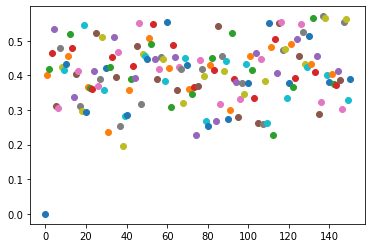

Wall time: 49min 38s


In [18]:
%%time
import random
import matplotlib.pyplot as plt 


optimizers = [1,2]
neurons = [50,200]
layers = [1,3]
epochs = [20,100]
parameters = [optimizers,neurons,layers,epochs]
state = [None] * (len(optimizers)*len(neurons)*len(layers)*len(epochs))


episodes = 150
epsilon = 0.99
decay = 0.5
step = 5
MAX = [0.3]*4

reward_log_total = [[0]*(step-1) for _ in range(episodes+1)]
Q = [[0] * 8 for _ in range(step)]
for j in range(step):
    for i in range(8):
        Q[j][i] = np.random.uniform(0.4, 0.41)
#original = initial_state(state,optimizers,neurons,layers,epochs)
#a,b,c,d = original[0],original[1],original[2],original[3]
# Update q values
act = np.random.randint(7)
print('action',act)

#values 
for j in range(episodes):
    clear_session()
    print('episode:',j)
    state = initial_state(state,optimizers,neurons,layers,epochs)
    print('begin_epsiode_state:',state)
    if np.random.random() > epsilon:
        # GET THE ACTION
        act = np.argmax(Q[0])
    else:
        act = np.random.randint(0, 8) 
    reward_log = [0]
    epsilon = epsilon*decay
    for i in range(step-1):
        states = i
        x = keras.layers.Input((4,))
        y= keras.layers.Dropout(0.1)(x)
        y = keras.layers.Dense(10, activation='relu')(y)
        y = keras.layers.Dropout(0.2)(y)
        y = keras.layers.Dense(10, activation='relu')(y)
        y = keras.layers.Dropout(0.2)(y)
        out = keras.layers.Dense(8, activation='softmax')(y)
        model = keras.models.Model(inputs=x, outputs=out)
        optimizer = keras.optimizers.Adamax()   
        model.compile(loss='categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])
        pred = model.predict(np.transpose([[state[0]/2],[state[1]/200],[state[2]/3],[state[3]/100]]))[0]
        act = np.argmax(pred)
        print('pred;',pred)
        print('action:',act)
        state = action(state,act)
        print('max:',MAX[i])
        reward =   Reward(state,x_train,x_test,Y_train,Y_test)
    
        reward_log.append(reward)
        gamma  = 0.95 #Discount rate 
        print('Old_Q:',Q[states])
        Q[states] = pred + gamma * max(Q[states+1]) - Q[states]
        print(Q[states])
        answer = [[0] for _ in range(8)]
        answer[act] = [1]
        model.fit(np.transpose([[state[0]/2],[state[1]/200],[state[2]/3],[state[3]/100]])
                  ,np.transpose(answer),verbose=1,epochs=1)
        print('New_Q:',Q[states])
        if np.random.random() > epsilon:
            # GET THE ACTION
            act = np.argmax(Q[states+1])
        else:
            act = np.random.randint(0, 8) #This action is not used for the last Q-table row  
        print('step_state:',state)
        print(Q)
        if reward >= MAX[i]:
            MAX[i] = reward
    reward_log_total[j+1] = reward_log
for i in range(len(reward_log_total)):
    plt.scatter(i,np.mean(reward_log_total[i]))
plt.show()

In [4]:
import numpy as np


def initial_state(state,optimizers,neurons,layers,epochs):
    state[0] = optimizers[np.random.randint(len(optimizers))]
    state[1] = neurons[np.random.randint(len(neurons))]
    state[2] = layers[np.random.randint(len(layers))]
    state[3] = epochs[np.random.randint(len(epochs))]
    return state 


def action(state,action):
    if action == 0:
        state[0] = parameters[0][0]
    if action == 1:
        state[0] = parameters[0][1]
    if action == 2:
        state[1] = parameters[1][0]
    if action == 3:
        state[1] = parameters[1][1]
    if action == 4:
        state[2] = parameters[2][0]
    if action == 5:
        state[2] = parameters[2][1]
    if action == 6:
        state[3] = parameters[3][0]
    if action == 7:
        state[3] = parameters[3][1]
        
    return state

In [34]:
import pickle

with open('20%_startup_3sigma_time', 'rb') as c1:
        time_series = pickle.load(c1)
with open('20%_startup_3sigma_class', 'rb') as d1:
        Class = pickle.load(d1)

In [36]:
%%time
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import clear_session


  
def Get_activation(optimizer):
    x = []
    if optimizer == 0:
        x = 'tanh'
    if optimizer == 1:
        x = 'relu'
    if optimizer == 2:
        x = 'sigmoid'
    return x
   
x = time_series
y = Class

x_train = x[::2]
y_train = y[::2]
x_test = x[1::2]
y_test = y[1::2]
#x_real = x[2::3]
#y_real = y[2::3]


#train,validation and testing sets
nb_classes =len(np.unique(y_test))
y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)
#nb_classes_real =len(np.unique(y_real))
#y_real = (y_real - y_real.min())/(y_real.max()-y_real.min())*(nb_classes_real-1)
batch_size = 128

Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)
#Y_real = keras.utils.to_categorical(y_real, nb_classes_real)

x_train_mean = x_train.mean()
x_train_std = x_train.std()
x_train = (x_train - x_train_mean)/(x_train_std)
x_test = (x_test - x_train_mean)/(x_train_std)
#x_real = (x_real - x_train_mean)/(x_train_std)

    
def Reward(state,x_train,x_test,Y_train,Y_test):
    optimizer = 'adam' 
    activation = Get_activation(state[0])
    neurons = state[2]
    layers = state[1]
    nb_epochs = 50
    
    

    x = keras.layers.Input(x_train.shape[1:])
    y= keras.layers.Dropout(0.05)(x)
    for i in range(layers):
        y = keras.layers.Dense(neurons, activation=activation)(y)
        y = keras.layers.Dropout(0.05)(y)
    out = keras.layers.Dense(nb_classes, activation='softmax')(y)

    model = keras.models.Model(inputs=x, outputs=out)
  
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                      patience=50, min_lr=0.1)

    hist = model.fit(x_train, Y_train, batch_size=batch_size, epochs=nb_epochs,
              verbose=0, validation_data=(x_test, Y_test), callbacks=[reduce_lr])
    #model.summary()
    #testing set
    #eva = model.evaluate(x_real,Y_real,verbose=0)
    log = pd.DataFrame(hist.history)
    print('val_loss',np.mean(log.iloc[-5:,0]))
    return np.mean(log.iloc[-5:,0])

Wall time: 13 ms


     val_loss  val_accuracy      loss  accuracy     lr
0    2.510564      0.246923  2.635386  0.100769  0.001
1    2.439835      0.228462  2.490250  0.128462  0.001
2    2.344898      0.299231  2.411735  0.203077  0.001
3    2.229439      0.260000  2.304223  0.255385  0.001
4    2.103783      0.319231  2.186374  0.289231  0.001
..        ...           ...       ...       ...    ...
195  0.555812      0.778462  0.605544  0.749231  0.001
196  0.546978      0.783846  0.582174  0.750769  0.001
197  0.548054      0.779231  0.581562  0.757692  0.001
198  0.541540      0.778462  0.577094  0.754615  0.001
199  0.545709      0.778462  0.577562  0.740769  0.001

[200 rows x 5 columns]


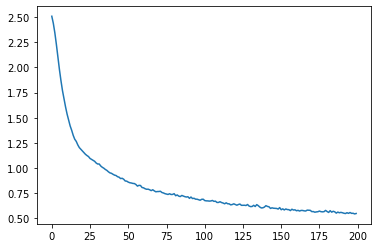

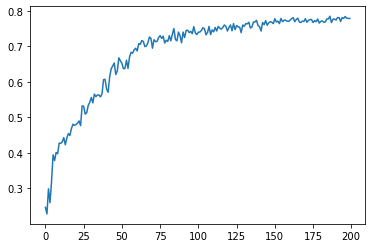

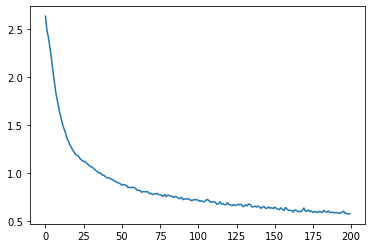

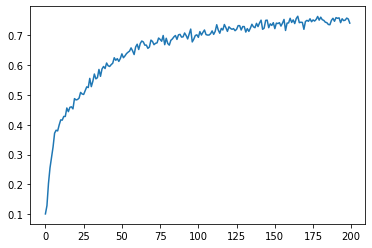

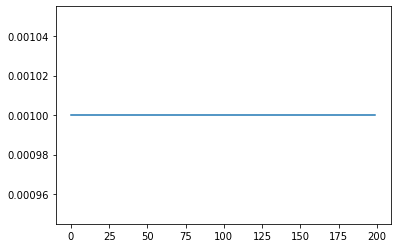

In [221]:
print(log)

plt.plot(log.iloc[:,0])
plt.show()
plt.plot(log.iloc[:,1])
plt.show()
plt.plot(log.iloc[:,2])
plt.show()
plt.plot(log.iloc[:,3])
plt.show()
plt.plot(log.iloc[:,4])
plt.show()

In [224]:
state = [2,3,100]
a = Reward(state,x_train,x_test,Y_train,Y_test)

val_loss 0.8874659409156213


In [150]:
line = pd.Series(hist.history['validation_loss'])
mean = line.rolling(20).mean()
std = line.rolling(20).std()
plt.plot(mean,label=label1)
plt.fill_between(std.index, mean-2*std, mean+2*std, alpha=0.2)


plt.yscale('log')
plt.title('Model Validation Loss with Dropout',size=18)
plt.ylabel('Validation Loss',size=15)
plt.xlabel('Epoch',size=15)
plt.legend(loc='upper right')
plt.ylim(0.9,2.3)
plt.yticks([1, 1.25,1.5,1.75, 2])
plt.show()

KeyError: 'validation_loss'

# Attempt 2

## Notes 
### 1) Can't select states that are already being used 


In [37]:
#Choose optimizer or epochs first
def new_state(state,action):
    #Create random initial values
    if state == []:
        state = [np.random.randint(0,3),np.random.randint(1,6),np.random.randint(100,125)]
        
    #Change the activation function
    if action == 0:
        old = state[0]
        state[0] = 0
    if action == 1:
        old = state[0]
        state[0] = 1
    if action == 2:
        old = state[0]
        state[0] = 2
            
    #Increase the layer size by 2
    if action == 3:
        if state[1] <= 5: state[1] = state[1] + 2
            
    #Decrease the layer size by 2
    if action == 4:
        if state[1] >= 3: state[1] = state[1] - 2
            
    #Increase the neurons size by 75
    if action == 5:
        if state[2] <= 125: state[2] = state[2] + 75
            
    #Decrease the neurons size by 75
    if action == 6:
        if state[2] >= 100: state[2] = state[2] - 75
    
    return state

def Deep_Q(state):
    clear_session()
    #Important lists 
    num_steps = []
    states = []
    train = []
    final_reward = []
    max_value = []
    epsilon = 0.09 #0.99
    decay = 0.90
    episodes = 50
    
    #Build Model 
    x = keras.layers.Input((3,),dtype='float')
    y = keras.layers.Dense(10, activation='relu')(x)
    y = keras.layers.Dense(10, activation='relu')(y)
    out = keras.layers.Dense(7, activation='sigmoid',dtype='float')(y)
    model = keras.models.Model(inputs=x, outputs=out)
    optimizer = keras.optimizers.Adamax()   
    model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy'])
    #state = new_state([],np.random.randint(0,7)) This is choosing a random starting state 
    state = [2,3,100]
    #Train the model to start with actions 
    x = np.transpose([[state[0]/3],[state[1]/5],[state[2]/300]])
    y = np.array([[0.5]*7])
    for s in range(5):
            hist = model.fit(x,y, verbose=0, epochs=150)
    for i in range(episodes):
        print('\n episode:',i)
        done = False
        states = []
        state = []
        train = []
        step_length = 0
        #state = new_state(state,np.random.randint(0,7))
        state = [2,3,100]
        print('start_state:',state)
        reward_log = []
        action_log = []
        acc_log = []
        
        #Calculate initial accuracy
        acc1 = [Reward(state,x_train,x_test,Y_train,Y_test)]
        
        while not done:
            
            #Next Action 
            pred = model.predict(np.transpose([[state[0]/3],[state[1]/5],[state[2]/300]]))[0]
            print('\n current_pred:',pred)
            
            #Epsilon greedy 
            epsilon = epsilon*decay
            if np.random.random() > epsilon:
                # GET THE ACTION
                action = np.argmax(pred)
                count = 1
                while action in action_log:
                    #Make sure that the selected action is a new action for this episode
                    print('action_log',action_log)
                    print('sorted_pred',np.argsort(pred))
                    action = np.argsort(pred)[-count]
                    count = count+1
                print('best action:',action)
            else:
                action = random.choice([x for x in range(7) if x not in action_log])
                print('random action:',action)
            action_log.append(action)
            
            #Next State and reward
            #The reward is the change in validation loss caused by the action 
            state = new_state(state,action)
            print('new_state',state)
            states.append(list(state))
            acc2 = Reward(state,x_train,x_test,Y_train,Y_test)
            reward = (acc1[0]-acc2)*10
            reward_log.append(reward)
            
            
            improve = reward_log[-1] 
            print('reward_log:',reward_log)
            print('improve:',improve)
            step_length = step_length+1
            
            #Update new initial accuracy
            acc_log.append(acc1[0])
            acc1[0] = acc2 

            if improve < 0.01:
                new_values = reward 
                values = pred
                values[action] = new_values
                print('new_values',values)
                train.append(values)
                done = True 
                
            if improve > 0.01:

                gamma  = 0.95 #Discount rate
                pred2 = model.predict(np.transpose([[state[0]/3],[state[1]/5],[state[2]/300]]))[0]
                print('future_pred:',pred2)

                #Future action 
                count = 1
                action2 = np.argmax(pred2)
                while action2 in action_log:
                    action2 = np.argsort(pred2)[-count]
                    count = count+1

                new_values = reward + gamma * pred2[action2] - pred[action]
                values = pred
                values[action] = new_values
                print('new_values',values)
                train.append(values)

        num_steps.append(step_length)
        final_reward.append(acc2)
        max_value.append(min(acc_log))
        
        #Fit Model
        train = np.array(train)
        print('train',train)
        print('fit',np.transpose([pd.DataFrame(states).iloc[:,0]/3,
                                  pd.DataFrame(states).iloc[:,1]/5,
                                  pd.DataFrame(states).iloc[:,2]/300]))
        x = np.transpose([pd.DataFrame(states).iloc[:,0]/3,
                                  pd.DataFrame(states).iloc[:,1]/5,
                                  pd.DataFrame(states).iloc[:,2]/300])
        y = train
        for i in range(5):
            hist = model.fit(x,y, batch_size=len(train), verbose=0, epochs=150)
        state = [2,3,100]
        print('test',model.predict(np.transpose([[state[0]/3],[state[1]/5],[state[2]/300]]))[0]) #test
        #Save model, clear session and reload model
        model.save("model.h5")
        clear_session()
        model = load_model('model.h5')
        print('test',model.predict(np.transpose([[state[0]/3],[state[1]/5],[state[2]/300]]))[0]) #test
    return num_steps,final_reward,max_value

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

 episode: 0
start_state: [2, 3, 100]
val_loss 0.8620148690297054

 current_pred: [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
best action: 0
new_state [0, 3, 100]
val_loss 0.5796587940729582
reward_log: [2.8235607495674717]
improve: 2.8235607495674717
future_pred: [0.5223862  0.51542175 0.51352066 0.5016539  0.4553149  0.50147766
 0.51561666]
new_values [2.8133965 0.5       0.5       0.5       0.5       0.5       0.5      ]

 current_pred: [0.5223862  0.51542175 0.51352066 0.5016539  0.4553149  0.50147766
 0.51561666]
action_log [0]
sorted_pred [4 5 3 2 1 6 0]
action_log [0]
sorted_pred [4 5 3 2 1 6 0]
best action: 6
new_state [0, 3, 25]
val_loss 0.768081677546868
reward_log: [2.8235607495674717, -1.8842288347390979]
improve: -1.8842288347390979
new_values [ 0.5223862   0.51542175  0.51352066  0.5016539   0.4553149   0.50147766
 -1.8842288 ]
train [[ 2.8133965   0.5         0.5    

val_loss 0.8513253381435687
reward_log: [3.0884649115342366, 0.055588052822993506, 0.11882653016310529, -2.9075439119338986]
improve: -2.9075439119338986
new_values [ 9.9999964e-01  3.1500459e-02 -2.9075439e+00  5.8479041e-01
  2.8555749e-02  7.7022427e-01  7.5646567e-06]
train [[ 2.7190166e+00  2.2146106e-03  3.9828095e-01  6.3485914e-01
   7.2578979e-01  9.8493224e-01  5.2376431e-06]
 [ 9.9998760e-01  9.1200024e-02  4.4423917e-01  5.3372449e-01
   3.9450888e-02 -1.1289148e-01  1.2602855e-04]
 [ 9.9999630e-01  1.0282025e-01  4.5304233e-01 -1.8623330e-02
   1.8472543e-02  6.1599934e-01  5.4499236e-05]
 [ 9.9999964e-01  3.1500459e-02 -2.9075439e+00  5.8479041e-01
   2.8555749e-02  7.7022427e-01  7.5646567e-06]]
fit [[0.         0.6        0.33333333]
 [0.         0.6        0.58333333]
 [0.         1.         0.58333333]
 [0.66666667 1.         0.58333333]]
test [1.0000000e+00 7.8260899e-05 1.1199683e-02 5.9759188e-01 2.5228322e-01
 9.1901386e-01 2.6375378e-07]
test [1.0000000e+00 7.826

val_loss 0.5583891986700203
reward_log: [2.6245103671000534, 0.37213585743537503]
improve: 0.37213585743537503
future_pred: [1.0000000e+00 3.0487776e-05 8.7323785e-04 5.4751039e-03 2.2004386e-03
 1.6886371e-03 4.9026067e-08]
new_values [1.0000000e+00 3.2901764e-04 4.3822229e-03 3.5534334e-01 8.6498223e-03
 9.2367521e-03 2.1338633e-06]

 current_pred: [1.0000000e+00 3.0487776e-05 8.7323785e-04 5.4751039e-03 2.2004386e-03
 1.6886371e-03 4.9026067e-08]
action_log [0, 3]
sorted_pred [6 1 2 5 4 3 0]
action_log [0, 3]
sorted_pred [6 1 2 5 4 3 0]
action_log [0, 3]
sorted_pred [6 1 2 5 4 3 0]
best action: 4
new_state [0, 3, 100]
val_loss 0.5937772631645203
reward_log: [2.6245103671000534, 0.37213585743537503, -0.3538806449449994]
improve: -0.3538806449449994
new_values [ 1.0000000e+00  3.0487776e-05  8.7323785e-04  5.4751039e-03
 -3.5388064e-01  1.6886371e-03  4.9026067e-08]
train [[ 1.6424491e+00  0.0000000e+00  5.3048134e-06  9.5039606e-05
   2.6047568e-05  7.0629644e-06  2.7414705e-13]
 [ 1

val_loss 0.563017247053293
reward_log: [2.7239930538030768, 0.14259304816906404]
improve: 0.14259304816906404
future_pred: [1.0000000e+00 6.7472458e-05 7.9548359e-04 4.1773602e-01 3.3253495e-05
 1.7934010e-04 2.5653668e-07]
new_values [1.0000000e+00 1.3566315e-03 7.2363317e-03 8.3509006e-02 9.9886776e-05
 7.1238488e-04 2.5171285e-06]

 current_pred: [1.0000000e+00 6.7472458e-05 7.9548359e-04 4.1773602e-01 3.3253495e-05
 1.7934010e-04 2.5653668e-07]
action_log [0, 3]
sorted_pred [6 4 1 5 2 3 0]
action_log [0, 3]
sorted_pred [6 4 1 5 2 3 0]
action_log [0, 3]
sorted_pred [6 4 1 5 2 3 0]
best action: 2
new_state [2, 5, 100]
val_loss 1.0677670610868013
reward_log: [2.7239930538030768, 0.14259304816906404, -5.047498140335083]
improve: -5.047498140335083
new_values [ 1.0000000e+00  6.7472458e-05 -5.0474982e+00  4.1773602e-01
  3.3253495e-05  1.7934010e-04  2.5653668e-07]
train [[ 1.7808409e+00  0.0000000e+00  4.7683716e-07  7.5189590e-01
   2.6109250e-09  1.7618795e-08  1.6233599e-13]
 [ 1.00

val_loss 0.8739026573988106
reward_log: [2.7265549457990224, 0.31733919693873514, 0.06245153170365558, -3.0199729890089753]
improve: -3.0199729890089753
new_values [ 1.0000000e+00  6.4074993e-06 -3.0199730e+00  3.3677250e-02
  1.4334127e-05  1.1536072e-04  1.5587348e-07]
train [[ 1.7733203e+00  0.0000000e+00  0.0000000e+00  2.1981657e-02
   2.2436988e-09  1.6671439e-08  2.3134820e-13]
 [ 1.0000000e+00  7.9989433e-05  7.1853399e-04  2.6824543e-01
   1.1805657e-04  8.3511573e-04  3.2080957e-06]
 [ 1.0000000e+00  1.6689301e-06  4.4733286e-05  1.7676443e-01
   2.4431389e-05  6.2414385e-02  1.7949981e-07]
 [ 1.0000000e+00  6.4074993e-06 -3.0199730e+00  3.3677250e-02
   1.4334127e-05  1.1536072e-04  1.5587348e-07]]
fit [[0.         0.6        0.33333333]
 [0.         1.         0.33333333]
 [0.         1.         0.58333333]
 [0.66666667 1.         0.58333333]]
test [1.0000000e+00 0.0000000e+00 0.0000000e+00 2.1935403e-02 5.0512790e-09
 6.4348926e-05 3.4095185e-13]
test [1.0000000e+00 0.0000

test [1.0000000e+00 0.0000000e+00 0.0000000e+00 2.0861626e-07 2.6733549e-10
 2.5547098e-07 4.1164903e-15]
test [1.0000000e+00 0.0000000e+00 0.0000000e+00 2.0861626e-07 2.6733549e-10
 2.5547098e-07 4.1164903e-15]

 episode: 20
start_state: [2, 3, 100]
val_loss 0.8588815945111786

 current_pred: [1.0000000e+00 0.0000000e+00 0.0000000e+00 2.0861626e-07 2.6733549e-10
 2.5547098e-07 4.1164903e-15]
best action: 0
new_state [0, 3, 100]
val_loss 0.577320252932035
reward_log: [2.815613415791436]
improve: 2.815613415791436
future_pred: [1.0000000e+00 2.4437904e-06 3.1769276e-05 1.8897653e-04 1.6223930e-05
 2.5102787e-03 1.6765340e-07]
new_values [1.8179982e+00 0.0000000e+00 0.0000000e+00 2.0861626e-07 2.6733549e-10
 2.5547098e-07 4.1164903e-15]

 current_pred: [1.0000000e+00 2.4437904e-06 3.1769276e-05 1.8897653e-04 1.6223930e-05
 2.5102787e-03 1.6765340e-07]
action_log [0]
sorted_pred [6 1 4 2 3 5 0]
action_log [0]
sorted_pred [6 1 4 2 3 5 0]
best action: 5
new_state [0, 3, 175]
val_loss 0.6040

test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.8274817e-11
 2.6386752e-04 7.7068202e-13]
test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.8274817e-11
 2.6386752e-04 7.7068202e-13]

 episode: 24
start_state: [2, 3, 100]
val_loss 0.8764992738136879

 current_pred: [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.8274817e-11
 2.6386752e-04 7.7068202e-13]
best action: 0
new_state [0, 3, 100]
val_loss 0.6088646644812364
reward_log: [2.676346093324514]
improve: 2.676346093324514
future_pred: [9.9999988e-01 2.2947788e-05 4.9471855e-05 2.7126074e-04 9.4761519e-05
 7.2087191e-02 3.2308744e-05]
new_values [1.7448289e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.8274817e-11
 2.6386752e-04 7.7068202e-13]

 current_pred: [9.9999988e-01 2.2947788e-05 4.9471855e-05 2.7126074e-04 9.4761519e-05
 7.2087191e-02 3.2308744e-05]
action_log [0]
sorted_pred [1 6 2 4 3 5 0]
action_log [0]
sorted_pred [1 6 2 4 3 5 0]
best action: 5
new_state [0, 3, 175]
val_loss 0.593

val_loss 0.7183414496275095
reward_log: [2.5874646370227525, 0.0819313742564276, -1.306132321357727]
improve: -1.306132321357727
new_values [ 9.9999982e-01  4.1544437e-05  4.5359135e-05  8.0466270e-06
 -1.3061323e+00  7.3283255e-02  3.0744326e-05]
train [[ 1.6369898e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   4.8025006e-09  4.2822391e-02  2.3132121e-10]
 [ 1.0000000e+00  2.7120113e-06  5.0961971e-06  5.7816505e-06
   2.3286377e-05  2.9844876e-02  8.6455366e-06]
 [ 9.9999982e-01  4.1544437e-05  4.5359135e-05  8.0466270e-06
  -1.3061323e+00  7.3283255e-02  3.0744326e-05]]
fit [[0.         0.6        0.33333333]
 [0.         0.6        0.58333333]
 [0.         0.2        0.58333333]]
test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.9562048e-13
 1.4149972e-02 2.9535614e-11]
test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.9562048e-13
 1.4149972e-02 2.9535614e-11]

 episode: 28
start_state: [2, 3, 100]
val_loss 0.8569810193868784

 current_pred: [1.0000

test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.9007961e-15
 4.3741474e-07 6.2123362e-17]
test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.9007961e-15
 4.3741474e-07 6.2123362e-17]

 episode: 32
start_state: [2, 3, 100]
val_loss 0.8696266492696909

 current_pred: [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.9007961e-15
 4.3741474e-07 6.2123362e-17]
best action: 0
new_state [0, 3, 100]
val_loss 0.5994910221466652
reward_log: [2.7013562712302575]
improve: 2.7013562712302575
future_pred: [1.0000000e+00 0.0000000e+00 8.9406967e-08 0.0000000e+00 4.3388964e-09
 1.1304224e-04 5.8540983e-10]
new_values [1.7014637e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.9007961e-15
 4.3741474e-07 6.2123362e-17]

 current_pred: [1.0000000e+00 0.0000000e+00 8.9406967e-08 0.0000000e+00 4.3388964e-09
 1.1304224e-04 5.8540983e-10]
action_log [0]
sorted_pred [1 3 6 4 2 5 0]
action_log [0]
sorted_pred [1 3 6 4 2 5 0]
best action: 5
new_state [0, 3, 175]
val_loss 0.5

test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5622689e-14
 1.9919957e-05 5.7768801e-16]
test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5622689e-14
 1.9919957e-05 5.7768801e-16]

 episode: 36
start_state: [2, 3, 100]
val_loss 0.8899876582805927

 current_pred: [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5622689e-14
 1.9919957e-05 5.7768801e-16]
best action: 0
new_state [0, 3, 100]
val_loss 0.5854059991102952
reward_log: [3.0458165917029745]
improve: 3.0458165917029745
future_pred: [1.0000000e+00 5.9604645e-08 1.1920929e-07 0.0000000e+00 3.2355217e-08
 7.6966878e-04 7.0600472e-09]
new_values [2.0465479e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5622689e-14
 1.9919957e-05 5.7768801e-16]

 current_pred: [1.0000000e+00 5.9604645e-08 1.1920929e-07 0.0000000e+00 3.2355217e-08
 7.6966878e-04 7.0600472e-09]
action_log [0]
sorted_pred [3 6 4 1 2 5 0]
action_log [0]
sorted_pred [3 6 4 1 2 5 0]
best action: 5
new_state [0, 3, 175]
val_loss 0.5

test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4051929e-17
 1.0847686e-09 1.1258430e-19]
test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4051929e-17
 1.0847686e-09 1.1258430e-19]

 episode: 41
start_state: [2, 3, 100]
val_loss 0.801332140482389

 current_pred: [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4051929e-17
 1.0847686e-09 1.1258430e-19]
best action: 0
new_state [0, 3, 100]
val_loss 0.6108572028233453
reward_log: [1.9047493765904366]
improve: 1.9047493765904366
future_pred: [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.0047425e-11
 1.4317228e-06 5.1919016e-12]
new_values [9.0475076e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4051929e-17
 1.0847686e-09 1.1258430e-19]

 current_pred: [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.0047425e-11
 1.4317228e-06 5.1919016e-12]
action_log [0]
sorted_pred [1 2 3 6 4 5 0]
action_log [0]
sorted_pred [1 2 3 6 4 5 0]
best action: 5
new_state [0, 3, 175]
val_loss 0.58

test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6935901e-17
 7.9506458e-07 1.2388018e-17]
test [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6935901e-17
 7.9506458e-07 1.2388018e-17]

 episode: 45
start_state: [2, 3, 100]
val_loss 0.8534243589547964

 current_pred: [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6935901e-17
 7.9506458e-07 1.2388018e-17]
best action: 0
new_state [0, 3, 100]
val_loss 0.6150916862120994
reward_log: [2.3833267274269696]
improve: 2.3833267274269696
future_pred: [1.0000000e+00 2.9802322e-08 5.9604645e-08 0.0000000e+00 4.2049758e-10
 3.5541199e-04 8.1436552e-10]
new_values [1.3836644e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6935901e-17
 7.9506458e-07 1.2388018e-17]

 current_pred: [1.0000000e+00 2.9802322e-08 5.9604645e-08 0.0000000e+00 4.2049758e-10
 3.5541199e-04 8.1436552e-10]
action_log [0]
sorted_pred [3 4 6 1 2 5 0]
action_log [0]
sorted_pred [3 4 6 1 2 5 0]
best action: 5
new_state [0, 3, 175]
val_loss 0.5

val_loss 0.5902058886748095
reward_log: [3.0020309030092673]
improve: 3.0020309030092673
future_pred: [1.00000000e+00 1.49011612e-07 2.68220901e-07 8.94069672e-08
 5.19928278e-09 2.84952344e-03 1.24562165e-08]
new_values [2.0047379e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.8641008e-17
 1.8349434e-06 1.4423790e-17]

 current_pred: [1.00000000e+00 1.49011612e-07 2.68220901e-07 8.94069672e-08
 5.19928278e-09 2.84952344e-03 1.24562165e-08]
action_log [0]
sorted_pred [4 6 3 1 2 5 0]
action_log [0]
sorted_pred [4 6 3 1 2 5 0]
best action: 5
new_state [0, 3, 175]
val_loss 0.6119662733811599
reward_log: [3.0020309030092673, -0.21760384706350444]
improve: -0.21760384706350444
new_values [ 1.00000000e+00  1.49011612e-07  2.68220901e-07  8.94069672e-08
  5.19928278e-09 -2.17603847e-01  1.24562165e-08]
train [[ 2.00473785e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.86410081e-17  1.83494342e-06  1.44237899e-17]
 [ 1.00000000e+00  1.49011612e-07  2.68220901e-07  8.94069672e-08
   

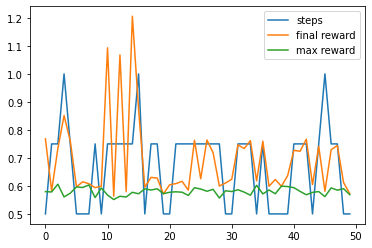

Wall time: 18min 24s


In [38]:
%%time
import numpy as np 
import random
import heapq
from matplotlib import pyplot as plt
from keras.models import load_model

state = []

num,reward,max_value = Deep_Q(state)
plt.plot(range(len(num)),np.array(num)/4,label='steps')
plt.plot(range(len(reward)),np.array(reward),label='final reward')
plt.plot(range(len(max_value)),np.array(max_value),label='max reward')
plt.legend()
plt.show()

before_test [0.52652353 0.50811726 0.48521408 0.42823404 0.6233287  0.50905883
 0.5510504 ]
test [0.4996298  0.4999775  0.499881   0.5003728  0.50083834 0.5000037
 0.5007969 ]
test [0.49998894 0.49999955 0.49999654 0.5000082  0.50002253 0.5000004
 0.50001925]
test [0.49999988 0.5        0.49999994 0.5000001  0.5000003  0.5
 0.50000024]
test [0.5        0.5        0.5        0.5        0.50000006 0.5
 0.5       ]
test [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
test [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
test [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
test [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
test [0.5 0.5 0.5 0.5 0.5 0.5 0.5]
test [0.5 0.5 0.5 0.5 0.5 0.5 0.5]


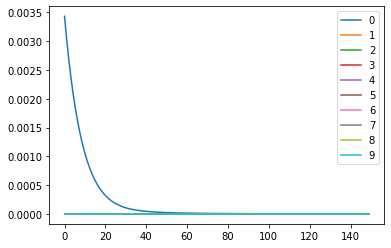

In [215]:
x = keras.layers.Input((3,),dtype='float')
y = keras.layers.Dense(10, activation='relu')(x)
y = keras.layers.Dense(10, activation='relu')(y)
out = keras.layers.Dense(7, activation='sigmoid',dtype='float')(y)
model = keras.models.Model(inputs=x, outputs=out)
optimizer = keras.optimizers.Adamax()   
model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy'])
#state = new_state([],np.random.randint(0,7)) This is choosing a random starting state 
state = [2,4,100]
#Train the model to start with actions 
x = np.transpose([[state[0]/3],[state[1]/5],[state[2]/300]])
y = np.array([[0.5]*7])
print('before_test',model.predict(np.transpose([[state[0]/3],[state[1]/5],[state[2]/300]]))[0])
for i in range(10):
    hist = model.fit(x,y, verbose=0, epochs=150)
    plt.plot(hist.history['loss'],label=i)
    print('test',model.predict(np.transpose([[state[0]/3],[state[1]/5],[state[2]/300]]))[0])
plt.legend()
plt.show()

In [41]:
for i in range(15):
    print(np.random.random())

0.8734855111260319
0.30570250924974973
0.9051951827914323
0.29894873271513667
0.9482802555151422
0.5353990021282539
0.8941193605471749
0.6660355523245636
0.866057431901755
0.3664346210506183
0.7820330406931866
0.5402896823685576
0.8602026911596926
0.0006813525459354874
0.34958007763312415


# Epsilon Decay 

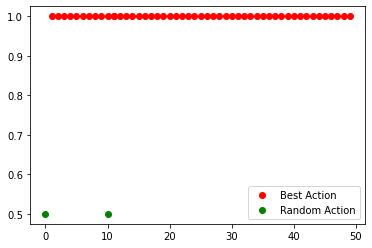

In [33]:
import numpy as np

epsilon = 0.99
decay = 0.1
episodes = 50
plt.scatter(11,1,color='r',label='Best Action')
plt.scatter(10,0.5,color='g',label='Random Action')
for i in range(episodes):
    if np.random.random() > epsilon:
        plt.scatter(i,1,color='r')
    else:
        plt.scatter(i,0.5,color='g')
    epsilon = epsilon*decay

plt.legend()
plt.show()

In [55]:
clear_session()

In [2]:
import matplotlib.pyplot as plt
running =10

def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

#print(num,reward)
plt.plot(range(len(num)),runningMeanFast(np.array(num)/4,running),label='Step length')
#plt.plot(range(len(reward)),runningMeanFast(np.array(reward),running),label='Accuracy')
plt.plot(range(len(max_value)),runningMeanFast(np.array(max_value),running),label='max reward')
plt.xlim(0,60)
#plt.ylim(0.5,0.9)
plt.legend()
plt.show()

plt.plot(range(len(num)),np.array(num)/4,label='Step length')
#plt.plot(range(len(reward)),np.array(reward),label='Accuracy')
plt.plot(range(len(max_value)),np.array(max_value),label='max reward')
plt.legend()
plt.show()

NameError: name 'num' is not defined

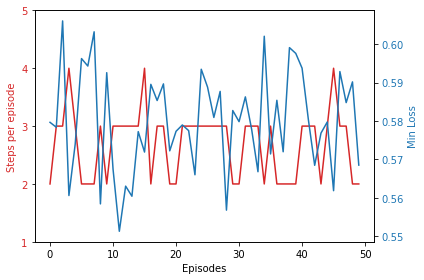

In [39]:
# Create some mock data
t = range(len(num))
data1 = np.array(num)
data2 = np.array(max_value)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Steps per episode', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.yticks((1,2,3,4,5), ('1','2','3','4','5'))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Min Loss', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()